# Model Building & Evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
training_data = pd.read_csv('training.csv')
testing_data = pd.read_csv('testing.csv')

In [2]:
X_train = training_data.drop(columns='Mineral Phase')
y_train = training_data['Mineral Phase']

X_test = testing_data.drop(columns='Mineral Phase')
y_test = testing_data['Mineral Phase']

## LightGBM

In [76]:
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [40]:
import lightgbm as lgb


# Training LightGBM
train_data = lgb.Dataset(X_train, label=y_train_encoded)
test_data = lgb.Dataset(X_test, label=y_test_encoded, reference=train_data)

params = {
    'objective': 'multiclass',
    'num_class': len(y_train.unique()),
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
}

num_round = 300
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)

C:\Users\61596\anaconda3\Lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.110922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34231
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 276
[LightGBM] [Info] Start training from score -3.179956
[LightGBM] [Info] Start training from score -3.173564
[LightGBM] [Info] Start training from score -3.182263
[LightGBM] [Info] Start training from score -3.175258
[LightGBM] [Info] Start training from score -3.177454
[LightGBM] [Info] Start training from score -3.177854
[LightGBM] [Info] Start training from score -3.172569
[LightGBM] [Info] Start training from score -3.180858
[LightGBM] [Info] Start training from score -3.177754
[LightGBM] [Info] Start training from score -3.174161
[LightGBM] [Info] Start training from score -3.176455
[LightGBM] [Info] Start training from score -3.182363
[LightGBM] [Info] Start training from score -3.175457
[Li

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Plot a nicely styled confusion matrix using seaborn heatmap.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize=(14, 12))
    
    # Use a sequential color palette for the heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=classes, yticklabels=classes, 
                annot_kws={"size": 10}, linewidths=0.5, ax=ax)
    
    # Highlight cells where the count is more than 100, excluding the diagonal
    for i in range(len(classes)):
        for j in range(len(classes)):
            if cm[i, j] > 100 and i != j:  # Exclude diagonal cells with i != j condition
                # Add rectangle around the cell
                ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=2.5))

    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predicted label', fontsize=16)
    plt.title(title, fontsize=20)
    plt.tick_params(axis='both', labelsize=12)
    plt.show()

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
# Predictions
y_pred_lgb = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_lgb_max = [np.argmax(val) for val in y_pred_lgb]

# Evaluation
print(classification_report(y_test_encoded, y_pred_lgb_max, target_names=label_encoder.classes_))

               precision    recall  f1-score   support

  Al-Silicate       0.97      0.99      0.98      2519
AlCa-Silicate       0.96      0.99      0.97      2455
AlFe-Silicate       0.88      0.79      0.83      2542
 AlK-Silicate       0.93      0.96      0.94      2472
AlMn-Silicate       0.96      0.98      0.97      2494
    Amphibole       0.87      0.87      0.87      2498
      Apatite       0.99      1.00      1.00      2445
   Background       0.97      0.93      0.95      2528
       Barite       0.98      0.98      0.98      2497
    Carbonate       1.00      1.00      1.00      2461
  Cassiterite       0.99      0.99      0.99      2484
     Chromite       0.99      0.99      0.99      2543
      Epidote       0.92      0.87      0.90      2474
     Fe-Oxide       0.91      0.91      0.91      2577
  Fe-Silicate       0.90      0.93      0.92      2571
  Fe-Sulphide       1.00      1.00      1.00      2476
     Ilmenite       0.96      0.94      0.95      2506
    Leuco

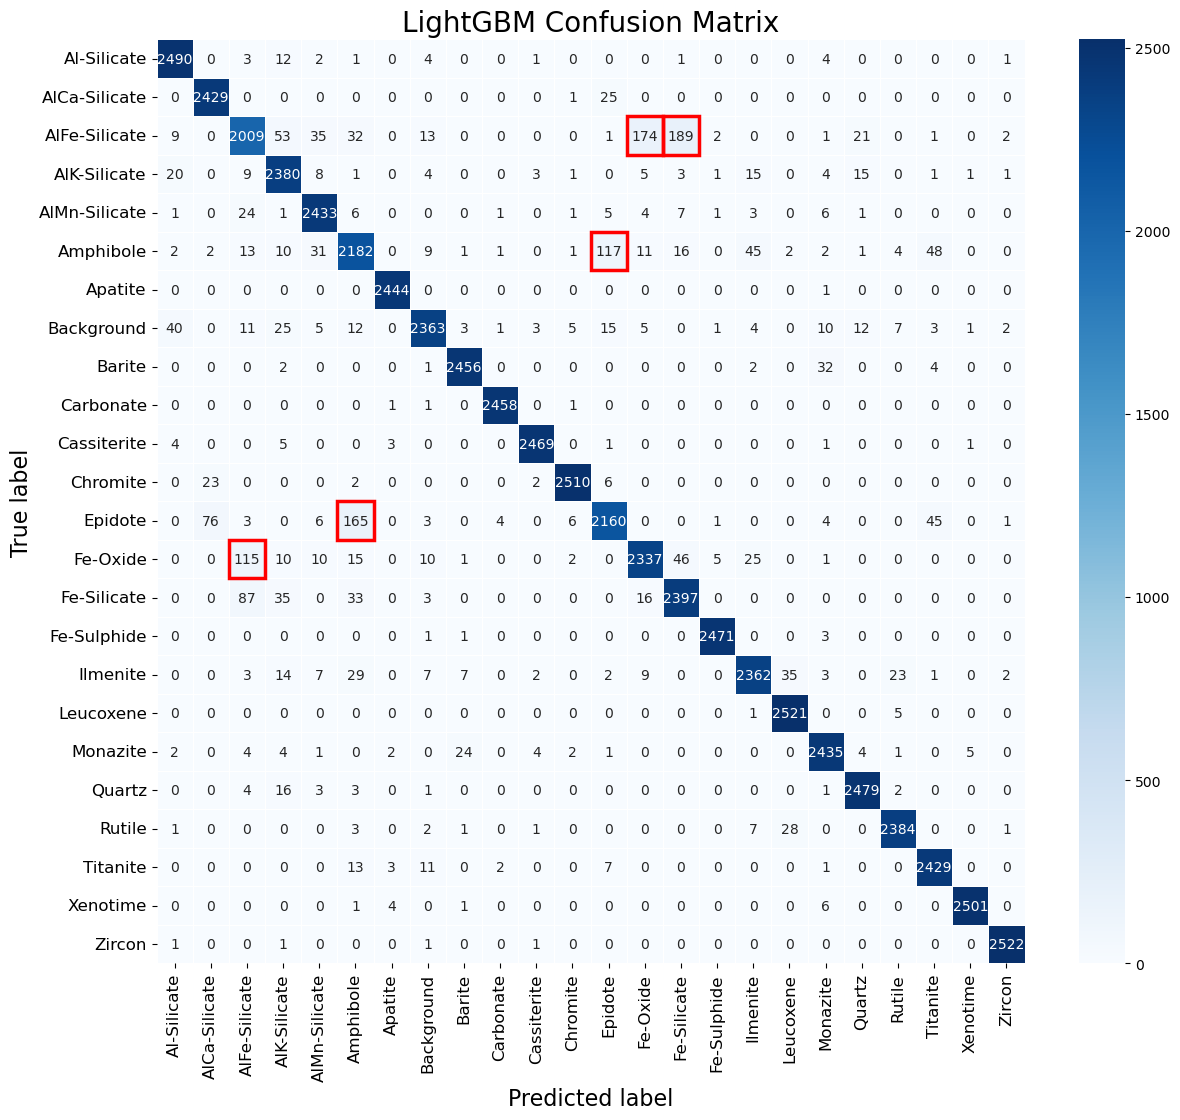

In [43]:
plot_confusion_matrix(y_test_encoded, y_pred_lgb_max, classes=label_encoder.classes_, title="LightGBM Confusion Matrix")

## XGBoost

In [ ]:
pip install xgboost

In [48]:
import xgboost as xgb

# Training XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test, label=y_test_encoded)

params = {
    'objective': 'multi:softprob',
    'num_class': len(y_train.unique()),
    'booster': 'gbtree',
    'eval_metric': 'mlogloss',
    'learning_rate': 0.05,
}

num_round = 500
bst_xgb = xgb.train(params, dtrain, num_round, evals=[(dtest, 'test')], early_stopping_rounds=10)

[0]	test-mlogloss:2.69627
[1]	test-mlogloss:2.41020
[2]	test-mlogloss:2.19894
[3]	test-mlogloss:2.03047
[4]	test-mlogloss:1.89017
[5]	test-mlogloss:1.76973
[6]	test-mlogloss:1.66464
[7]	test-mlogloss:1.57165
[8]	test-mlogloss:1.48776
[9]	test-mlogloss:1.41193
[10]	test-mlogloss:1.34248
[11]	test-mlogloss:1.27846
[12]	test-mlogloss:1.21962
[13]	test-mlogloss:1.16509
[14]	test-mlogloss:1.11451
[15]	test-mlogloss:1.06731
[16]	test-mlogloss:1.02323
[17]	test-mlogloss:0.98188
[18]	test-mlogloss:0.94310
[19]	test-mlogloss:0.90673
[20]	test-mlogloss:0.87229
[21]	test-mlogloss:0.83983
[22]	test-mlogloss:0.80929
[23]	test-mlogloss:0.78032
[24]	test-mlogloss:0.75291
[25]	test-mlogloss:0.72692
[26]	test-mlogloss:0.70231
[27]	test-mlogloss:0.67905
[28]	test-mlogloss:0.65684
[29]	test-mlogloss:0.63576
[30]	test-mlogloss:0.61573
[31]	test-mlogloss:0.59670
[32]	test-mlogloss:0.57846
[33]	test-mlogloss:0.56114
[34]	test-mlogloss:0.54461
[35]	test-mlogloss:0.52902
[36]	test-mlogloss:0.51394
[37]	test-m

In [49]:
# Predictions
y_pred_xgb = bst_xgb.predict(dtest)
y_pred_xgb_max = [np.argmax(val) for val in y_pred_xgb]

# Evaluation
print(classification_report(y_test_encoded, y_pred_xgb_max, target_names=label_encoder.classes_))

               precision    recall  f1-score   support

  Al-Silicate       0.97      0.99      0.98      2519
AlCa-Silicate       0.96      0.99      0.97      2455
AlFe-Silicate       0.88      0.78      0.83      2542
 AlK-Silicate       0.92      0.97      0.94      2472
AlMn-Silicate       0.95      0.97      0.96      2494
    Amphibole       0.88      0.87      0.87      2498
      Apatite       1.00      1.00      1.00      2445
   Background       0.98      0.93      0.95      2528
       Barite       0.98      0.98      0.98      2497
    Carbonate       1.00      1.00      1.00      2461
  Cassiterite       0.99      0.99      0.99      2484
     Chromite       0.99      0.99      0.99      2543
      Epidote       0.92      0.88      0.90      2474
     Fe-Oxide       0.91      0.91      0.91      2577
  Fe-Silicate       0.89      0.93      0.91      2571
  Fe-Sulphide       1.00      1.00      1.00      2476
     Ilmenite       0.96      0.94      0.95      2506
    Leuco

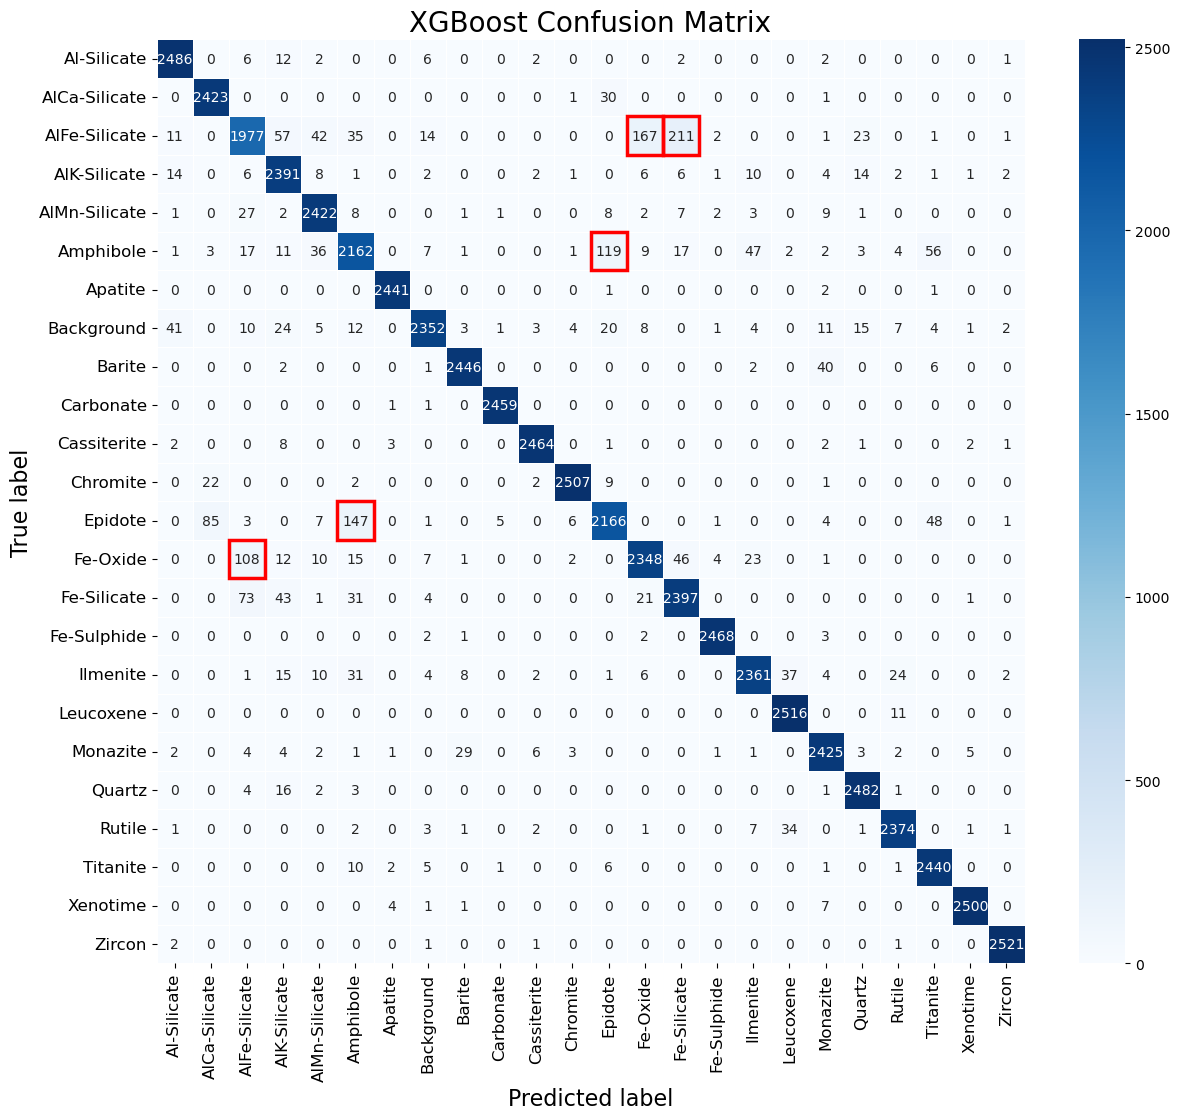

In [50]:
plot_confusion_matrix(y_test_encoded, y_pred_xgb_max, classes=label_encoder.classes_, title="XGBoost Confusion Matrix")

## CatBoost

In [ ]:
pip install catboost

In [45]:
from catboost import CatBoostClassifier, Pool

# Training CatBoost
train_pool = Pool(X_train, label=y_train_encoded)
test_pool = Pool(X_test, label=y_test_encoded)

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    loss_function='MultiClass',
    eval_metric='MultiClass',
    early_stopping_rounds=10,
    verbose=10
)

bst_cat = model.fit(train_pool, eval_set=test_pool)

0:	learn: 2.8789393	test: 2.8801234	best: 2.8801234 (0)	total: 2.97s	remaining: 24m 41s
10:	learn: 1.6817946	test: 1.6864367	best: 1.6864367 (10)	total: 33.2s	remaining: 24m 34s
20:	learn: 1.2094525	test: 1.2137161	best: 1.2137161 (20)	total: 1m 4s	remaining: 24m 27s
30:	learn: 0.9140192	test: 0.9176779	best: 0.9176779 (30)	total: 1m 36s	remaining: 24m 15s
40:	learn: 0.7535870	test: 0.7568224	best: 0.7568224 (40)	total: 2m 6s	remaining: 23m 40s
50:	learn: 0.6396952	test: 0.6427836	best: 0.6427836 (50)	total: 2m 37s	remaining: 23m 9s
60:	learn: 0.5530345	test: 0.5558635	best: 0.5558635 (60)	total: 3m 9s	remaining: 22m 45s
70:	learn: 0.4895038	test: 0.4922369	best: 0.4922369 (70)	total: 3m 40s	remaining: 22m 12s
80:	learn: 0.4450100	test: 0.4480075	best: 0.4480075 (80)	total: 4m 11s	remaining: 21m 41s
90:	learn: 0.4074240	test: 0.4103820	best: 0.4103820 (90)	total: 4m 42s	remaining: 21m 8s
100:	learn: 0.3765732	test: 0.3795946	best: 0.3795946 (100)	total: 5m 13s	remaining: 20m 38s
110:	l

In [46]:
# Predictions
y_pred_cat = bst_cat.predict(test_pool)
y_pred_cat_max = [val[0] for val in y_pred_cat]

# Evaluation
print(classification_report(y_test_encoded, y_pred_cat_max, target_names=label_encoder.classes_))

               precision    recall  f1-score   support

  Al-Silicate       0.95      0.99      0.97      2519
AlCa-Silicate       0.92      0.97      0.95      2455
AlFe-Silicate       0.85      0.69      0.76      2542
 AlK-Silicate       0.90      0.95      0.92      2472
AlMn-Silicate       0.94      0.96      0.95      2494
    Amphibole       0.83      0.82      0.82      2498
      Apatite       0.99      1.00      1.00      2445
   Background       0.94      0.92      0.93      2528
       Barite       0.98      0.97      0.97      2497
    Carbonate       0.99      1.00      1.00      2461
  Cassiterite       0.99      0.99      0.99      2484
     Chromite       0.99      0.98      0.98      2543
      Epidote       0.88      0.81      0.84      2474
     Fe-Oxide       0.88      0.89      0.88      2577
  Fe-Silicate       0.86      0.90      0.88      2571
  Fe-Sulphide       0.99      1.00      0.99      2476
     Ilmenite       0.94      0.92      0.93      2506
    Leuco

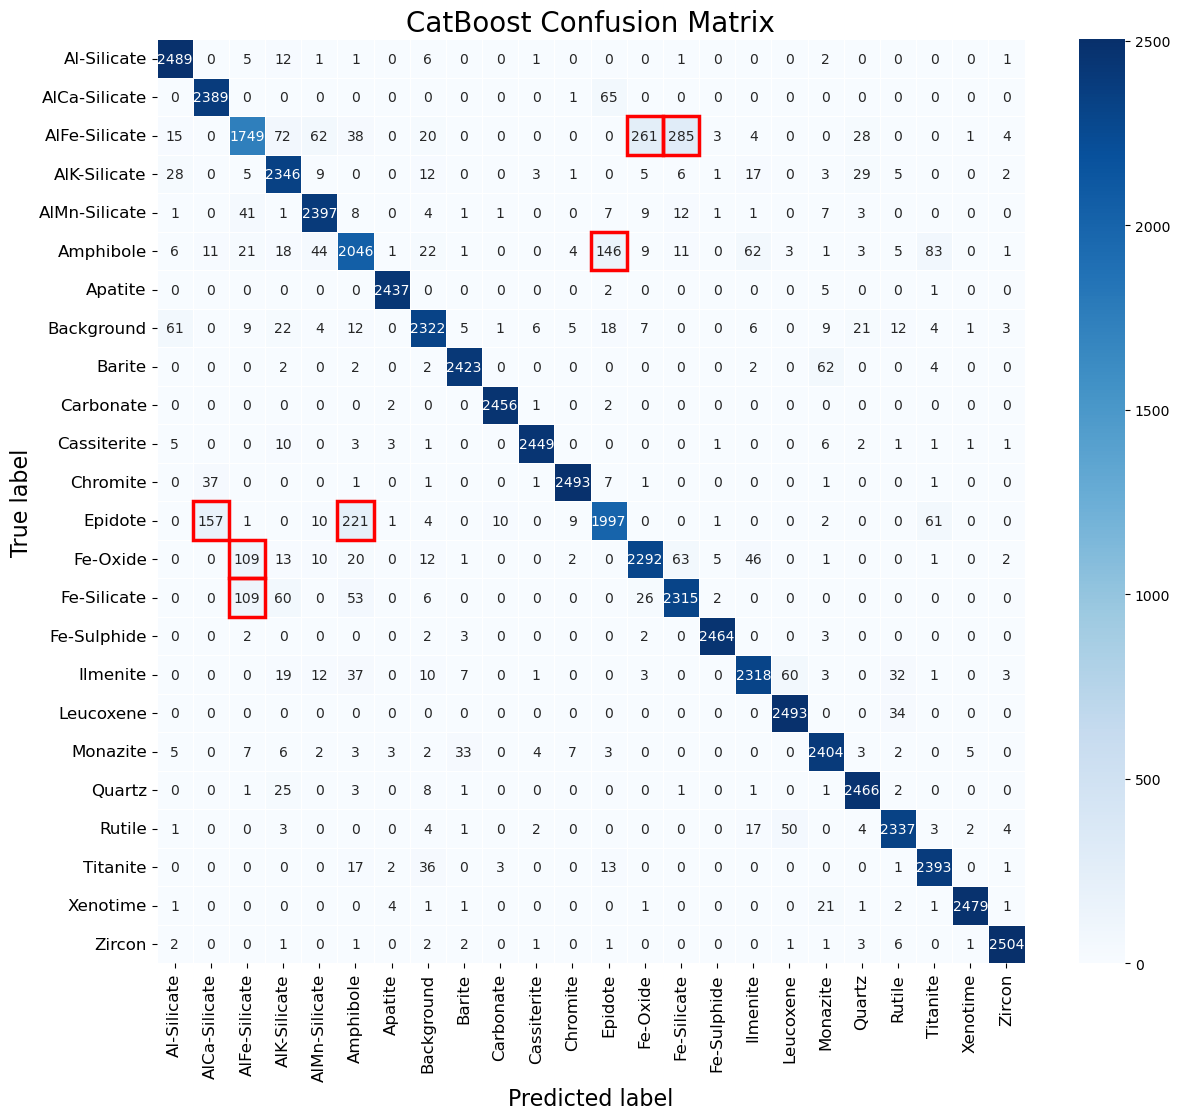

In [47]:
plot_confusion_matrix(y_test_encoded, y_pred_cat_max, classes=label_encoder.classes_, title="CatBoost Confusion Matrix")

## TabNet

In [ ]:
pip install pytorch-tabnet

In [54]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

clf = TabNetClassifier(
    n_d=16,
    n_a=16,
    n_steps=5,
    gamma=1.5,
    n_independent=2,
    n_shared=2,
    lambda_sparse=0.01, 
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax',
    scheduler_params=dict(mode="min",
                          patience=5,
                          min_lr=1e-5,
                          factor=0.9,),
    scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
    seed=42,
    verbose=1
)

clf.fit(
    X_train.values, y_train_encoded,
    eval_set=[(X_test.values, y_test_encoded)],
    eval_name=['valid'],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,  # Patience for early stopping
    batch_size=2048,  
    virtual_batch_size=256,  
    num_workers=0,  # It's safer to keep it at 0 when using virtual batches.
    drop_last=False,
    loss_fn=torch.nn.functional.cross_entropy
)

C:\Users\61596\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.15436 | valid_accuracy: 0.66285 |  0:00:23s
epoch 1  | loss: 0.7636  | valid_accuracy: 0.79707 |  0:00:46s
epoch 2  | loss: 0.51694 | valid_accuracy: 0.8548  |  0:01:09s
epoch 3  | loss: 0.37203 | valid_accuracy: 0.9039  |  0:01:33s
epoch 4  | loss: 0.30528 | valid_accuracy: 0.9148  |  0:01:56s
epoch 5  | loss: 0.27088 | valid_accuracy: 0.92145 |  0:02:19s
epoch 6  | loss: 0.2545  | valid_accuracy: 0.92265 |  0:02:42s
epoch 7  | loss: 0.24449 | valid_accuracy: 0.92785 |  0:03:05s
epoch 8  | loss: 0.23327 | valid_accuracy: 0.92867 |  0:03:27s
epoch 9  | loss: 0.22329 | valid_accuracy: 0.93035 |  0:03:50s
epoch 10 | loss: 0.22188 | valid_accuracy: 0.92598 |  0:04:13s
epoch 11 | loss: 0.21505 | valid_accuracy: 0.92738 |  0:04:36s
epoch 12 | loss: 0.20616 | valid_accuracy: 0.93267 |  0:04:59s
epoch 13 | loss: 0.1987  | valid_accuracy: 0.93645 |  0:05:22s
epoch 14 | loss: 0.19855 | valid_accuracy: 0.9333  |  0:05:45s
epoch 15 | loss: 0.19931 | valid_accuracy: 0.93528 |  0

C:\Users\61596\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [56]:
# Predict on the test set
y_pred_tabnet = clf.predict(X_test.values)

report = classification_report(y_test_encoded, y_pred_tabnet, target_names=label_encoder.classes_)
print(report)

               precision    recall  f1-score   support

  Al-Silicate       0.96      0.98      0.97      2519
AlCa-Silicate       0.94      1.00      0.97      2455
AlFe-Silicate       0.85      0.79      0.82      2542
 AlK-Silicate       0.94      0.93      0.93      2472
AlMn-Silicate       0.95      0.97      0.96      2494
    Amphibole       0.89      0.85      0.87      2498
      Apatite       0.99      1.00      1.00      2445
   Background       0.95      0.95      0.95      2528
       Barite       0.97      0.98      0.98      2497
    Carbonate       1.00      1.00      1.00      2461
  Cassiterite       0.99      0.99      0.99      2484
     Chromite       0.98      0.99      0.99      2543
      Epidote       0.91      0.88      0.90      2474
     Fe-Oxide       0.94      0.88      0.91      2577
  Fe-Silicate       0.88      0.95      0.92      2571
  Fe-Sulphide       0.99      1.00      0.99      2476
     Ilmenite       0.95      0.94      0.94      2506
    Leuco

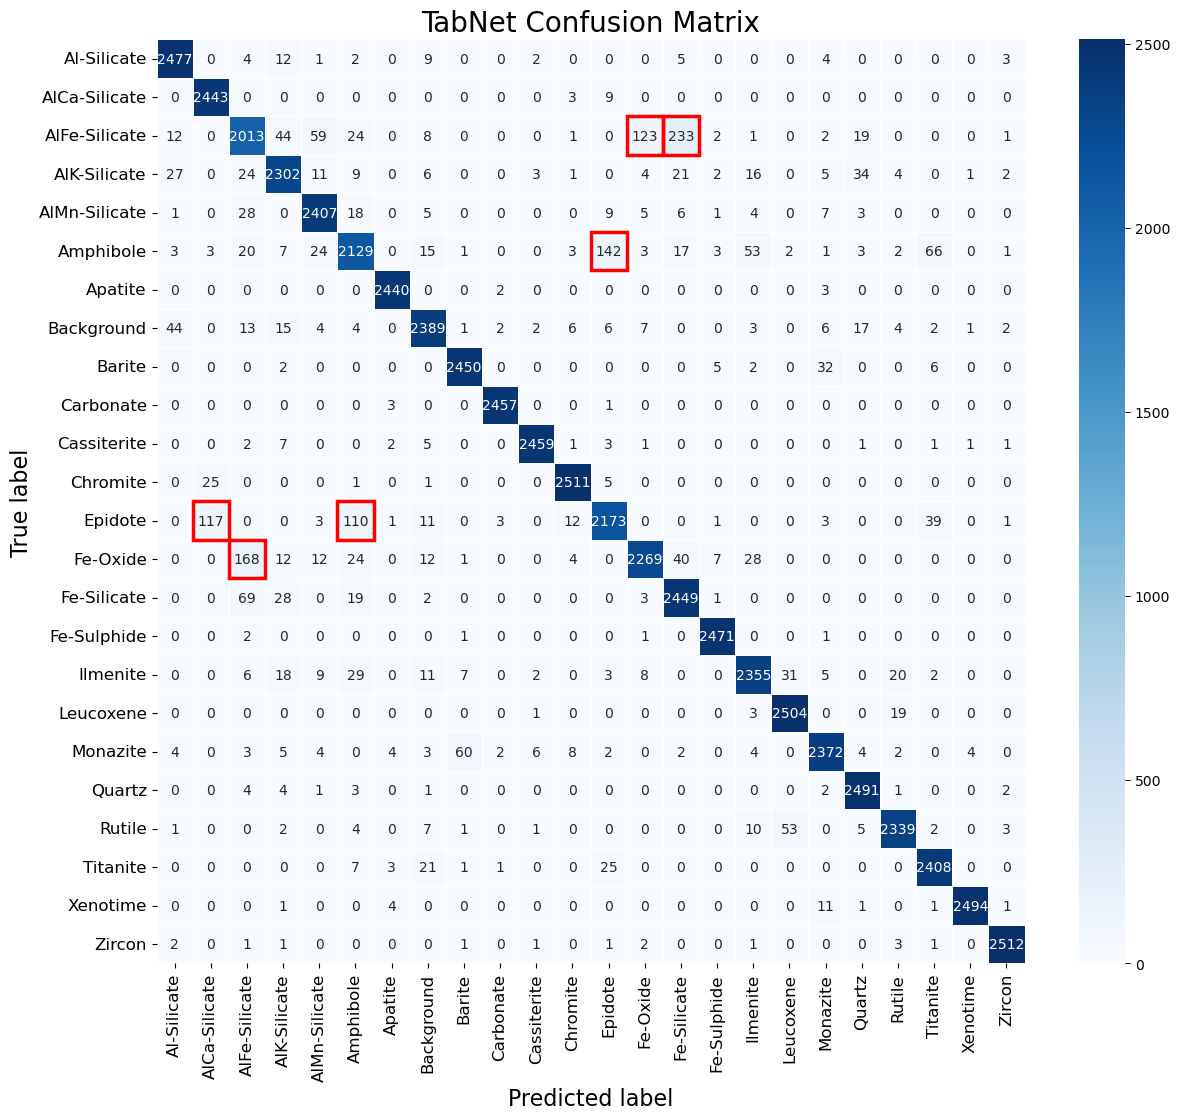

In [58]:
plot_confusion_matrix(y_test_encoded, y_pred_tabnet, classes=label_encoder.classes_, title="TabNet Confusion Matrix")

## Model Evaluation

In [69]:
#Testing
test_10_transformed = pd.read_csv('10_transformed.csv')
balanced_transformed = pd.read_csv('balanced_transformed.csv')

# Split test_10_transformed into known and unknown based on Mineral Phase
df_known = test_10_transformed[test_10_transformed['Mineral Phase'].isin(label_encoder.classes_)]
df_unknown = test_10_transformed[~test_10_transformed['Mineral Phase'].isin(label_encoder.classes_)]

X_known = df_known.drop(columns='Mineral Phase')
y_known = df_known['Mineral Phase']

# Encode the labels of the known dataset
y_known_encoded = label_encoder.transform(y_known)

In [70]:
X_balanced_transformed = balanced_transformed.drop(columns='Mineral Phase')
y_balanced_transformed = balanced_transformed['Mineral Phase']
y_balanced_transformed_encoded = label_encoder.transform(y_balanced_transformed)

In [106]:
def evaluate_model_predictions(model_name, model, X, y_encoded, label_encoder):
    # Predictions
    y_pred_prob = model.predict(X)
    
    if model_name in ['LightGBM', 'XGBoost']:
        y_pred = [np.argmax(val) for val in y_pred_prob]
    else:
        y_pred = y_pred_prob.reshape(-1)
        
    # Unique labels for prediction and ground truth
    unique_labels = np.unique(np.concatenate((y_encoded, y_pred)))
    class_names = label_encoder.inverse_transform(unique_labels)

    # Evaluation Metrics
    accuracy = accuracy_score(y_encoded, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.4f}\n")
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_encoded, y_pred, labels=unique_labels, target_names=class_names))

In [107]:
print("\nEvaluating LightGBM on 10_transformed dataset:")
evaluate_model_predictions('LightGBM', bst, X_known, y_known_encoded, label_encoder)

print("\nEvaluating LightGBM on balanced_transformed dataset:")
evaluate_model_predictions('LightGBM', bst, X_balanced_transformed, y_balanced_transformed_encoded, label_encoder)


Evaluating LightGBM on 10_transformed dataset:
Accuracy for LightGBM: 0.9092

Classification Report for LightGBM:
               precision    recall  f1-score   support

  Al-Silicate       0.65      0.98      0.78       124
AlCa-Silicate       0.29      1.00      0.45        69
AlFe-Silicate       0.88      0.79      0.83      4306
 AlK-Silicate       0.49      0.96      0.65       338
AlMn-Silicate       0.95      0.98      0.97      3864
    Amphibole       0.87      0.87      0.87      3984
      Apatite       0.40      1.00      0.57         6
   Background       0.99      0.90      0.94      7000
       Barite       0.67      0.67      0.67        15
  Cassiterite       0.94      1.00      0.97        15
     Chromite       0.92      1.00      0.96        22
      Epidote       0.93      0.88      0.91      5193
     Fe-Oxide       0.94      0.90      0.92      7000
  Fe-Silicate       0.75      0.93      0.83      1229
  Fe-Sulphide       0.75      1.00      0.85      1079
    

In [109]:
dtest_10_transformed = xgb.DMatrix(X_known)
dtest_balanced = xgb.DMatrix(X_balanced_transformed)

print("Evaluating XGBoost on 10_transformed dataset:")
evaluate_model_predictions("XGBoost", bst_xgb, dtest_10_transformed, y_known_encoded, label_encoder)

print("Evaluating XGBoost on balanced_transformed dataset:")
evaluate_model_predictions("XGBoost", bst_xgb, dtest_balanced, y_balanced_transformed_encoded, label_encoder)

Evaluating XGBoost on 10_transformed dataset:
Accuracy for XGBoost: 0.9076

Classification Report for XGBoost:
               precision    recall  f1-score   support

  Al-Silicate       0.65      0.98      0.78       124
AlCa-Silicate       0.27      1.00      0.42        69
AlFe-Silicate       0.88      0.79      0.83      4306
 AlK-Silicate       0.49      0.95      0.64       338
AlMn-Silicate       0.95      0.99      0.97      3864
    Amphibole       0.86      0.86      0.86      3984
      Apatite       0.43      1.00      0.60         6
   Background       0.99      0.90      0.94      7000
       Barite       0.62      0.67      0.65        15
  Cassiterite       0.94      1.00      0.97        15
     Chromite       0.91      0.95      0.93        22
      Epidote       0.94      0.88      0.91      5193
     Fe-Oxide       0.94      0.90      0.92      7000
  Fe-Silicate       0.74      0.93      0.83      1229
  Fe-Sulphide       0.74      1.00      0.85      1079
     Ilm

In [111]:
print("Evaluating CatBoost on 10_transformed dataset:")
evaluate_model_predictions("CatBoost", bst_cat, X_known, y_known_encoded, label_encoder)

print("Evaluating CatBoost on balanced_transformed dataset:")
evaluate_model_predictions("CatBoost", bst_cat, X_balanced_transformed, y_balanced_transformed_encoded, label_encoder)

Evaluating CatBoost on 10_transformed dataset:
Accuracy for CatBoost: 0.8754

Classification Report for CatBoost:
               precision    recall  f1-score   support

  Al-Silicate       0.57      0.99      0.73       124
AlCa-Silicate       0.16      1.00      0.28        69
AlFe-Silicate       0.87      0.67      0.76      4306
 AlK-Silicate       0.44      0.94      0.60       338
AlMn-Silicate       0.94      0.98      0.96      3864
    Amphibole       0.80      0.83      0.81      3984
      Apatite       0.29      0.83      0.43         6
   Background       0.98      0.89      0.93      7000
       Barite       0.73      0.53      0.62        15
  Cassiterite       0.94      1.00      0.97        15
     Chromite       0.84      0.95      0.89        22
      Epidote       0.92      0.80      0.86      5193
     Fe-Oxide       0.89      0.90      0.89      7000
  Fe-Silicate       0.70      0.90      0.79      1229
  Fe-Sulphide       0.71      0.99      0.83      1079
     

In [96]:
def evaluate_tabnet_on_dataset(X, y, dataset_name):
    # Predict using TabNet
    y_pred_tabnet = clf.predict(X.values)

    # If y_pred_tabnet is a 2D array, take the argmax to get class labels
    if y_pred_tabnet.ndim > 1:
        y_pred_tabnet = np.argmax(y_pred_tabnet, axis=1)

    y_encoded = label_encoder.transform(y)

    # Calculate accuracy
    accuracy_tabnet = accuracy_score(y_encoded, y_pred_tabnet)
    print(f"Accuracy for TabNet on {dataset_name} dataset: {accuracy_tabnet:.4f}\n")

    # Display the classification report
    print(f"Classification Report for TabNet on {dataset_name} dataset:")
    print(classification_report(y, label_encoder.inverse_transform(y_pred_tabnet)))

In [97]:
evaluate_tabnet_on_dataset(X_known, y_known, "10_transformed known")

Accuracy for TabNet on 10_transformed known dataset: 0.9012

Classification Report for TabNet on 10_transformed known dataset:
               precision    recall  f1-score   support

  Al-Silicate       0.62      0.98      0.76       124
AlCa-Silicate       0.21      1.00      0.35        69
AlFe-Silicate       0.86      0.79      0.82      4306
 AlK-Silicate       0.51      0.90      0.65       338
AlMn-Silicate       0.94      0.98      0.96      3864
    Amphibole       0.87      0.84      0.86      3984
      Apatite       0.30      1.00      0.46         6
   Background       0.98      0.92      0.95      7000
       Barite       0.43      0.67      0.53        15
  Cassiterite       1.00      1.00      1.00        15
     Chromite       0.84      0.95      0.89        22
      Epidote       0.94      0.87      0.90      5193
     Fe-Oxide       0.95      0.88      0.91      7000
  Fe-Silicate       0.74      0.94      0.83      1229
  Fe-Sulphide       0.70      1.00      0.82   

In [98]:
evaluate_tabnet_on_dataset(X_balanced_transformed, y_balanced_transformed, "balanced_transformed")

Accuracy for TabNet on balanced_transformed dataset: 0.9604

Classification Report for TabNet on balanced_transformed dataset:
               precision    recall  f1-score   support

  Al-Silicate       0.96      0.99      0.97      3000
AlCa-Silicate       0.95      0.99      0.97      3000
AlFe-Silicate       0.87      0.82      0.84      3000
 AlK-Silicate       0.95      0.94      0.95      3000
AlMn-Silicate       0.96      0.98      0.97      3000
    Amphibole       0.90      0.86      0.88      3000
      Apatite       0.99      1.00      1.00      3000
   Background       0.96      0.94      0.95      3000
       Barite       0.97      0.99      0.98      3000
    Carbonate       1.00      1.00      1.00      3000
  Cassiterite       0.99      0.99      0.99      3000
     Chromite       0.98      0.99      0.99      3000
      Epidote       0.92      0.89      0.91      3000
     Fe-Oxide       0.94      0.90      0.92      3000
  Fe-Silicate       0.90      0.96      0.93   

## Introduce Probabilities (LightGBM)

In [158]:
# Predict probabilities
probs = bst.predict(X_known)

# Extract top two probabilities and their respective labels for each instance
top_two_probs = np.partition(probs, -2, axis=1)[:, -2:]
top_two_labels = np.argsort(probs, axis=1)[:, -2:]

# Determine predictions that are 'Not Sure' based on the threshold
preds_confident = [label_encoder.classes_[i] if row[i] >= 0.8 else 'Not Sure' for row, i in zip(probs, np.argmax(probs, axis=1))]

In [159]:
# Extracting 50 'Not Sure' samples
samples = []

for i, pred in enumerate(preds_confident):
    if pred == 'Not Sure':
        true_label = y_known.iloc[i]
        
        top_predicted_label = label_encoder.classes_[top_two_labels[i, 1]]
        top_predicted_prob = top_two_probs[i, 1] * 100  # Converting to percentage
        
        second_predicted_label = label_encoder.classes_[top_two_labels[i, 0]]
        second_predicted_prob = top_two_probs[i, 0] * 100  # Converting to percentage
        
        sample = (true_label, top_predicted_label, top_predicted_prob, second_predicted_label, second_predicted_prob)
        samples.append(sample)
        
        if len(samples) == 50:
            break

from tabulate import tabulate

# Convert samples list to DataFrame
df_samples = pd.DataFrame(samples, columns=['True Label', 'Top Predicted Label', 'Top Probability', '2nd Predicted Label', '2nd Guess Probability'])

# Create the modified dataframe
df_samples['Prediction'] = 'Not Sure'
df_samples['Top Prediction'] = df_samples['Top Predicted Label'] + "  " + df_samples['Top Probability'].round(2).astype(str)
df_samples['2nd Prediction'] = df_samples['2nd Predicted Label'] + "  " + df_samples['2nd Guess Probability'].round(2).astype(str)

# Selecting the columns we need
df_display = df_samples[['True Label', 'Prediction', 'Top Prediction', '2nd Prediction']]

# Displaying the dataframe as a table
print("\nDisplaying 50 examples of 'Not Sure' Predictions:")
print(tabulate(df_display, headers='keys', tablefmt='grid'))


Displaying 50 examples of 'Not Sure' Predictions:
+----+---------------+--------------+----------------------+----------------------+
|    | True Label    | Prediction   | Top Prediction       | 2nd Prediction       |
+====+===============+==============+======================+======================+
|  0 | Background    | Not Sure     | Background  66.14    | Fe-Oxide  31.27      |
+----+---------------+--------------+----------------------+----------------------+
|  1 | Quartz        | Not Sure     | Quartz  70.12        | Rutile  29.25        |
+----+---------------+--------------+----------------------+----------------------+
|  2 | Epidote       | Not Sure     | Epidote  70.34       | AlCa-Silicate  29.47 |
+----+---------------+--------------+----------------------+----------------------+
|  3 | Amphibole     | Not Sure     | Amphibole  54.82     | Fe-Oxide  42.06      |
+----+---------------+--------------+----------------------+----------------------+
|  4 | Epidote       | No

In [160]:
# Percentage of 'Not Sure' samples
perc_not_sure = preds_confident.count('Not Sure') / len(preds_confident) * 100
print(f"\nPercentage of 'Not Sure' predictions: {perc_not_sure:.2f}%")

# Distribution of true classes for 'Not Sure' samples
mask_not_sure = [pred == 'Not Sure' for pred in preds_confident]
not_sure_true_labels = [y_known_encoded[i] for i, m in enumerate(mask_not_sure) if m]
unique_labels, counts = np.unique(not_sure_true_labels, return_counts=True)

print("\nDistribution of True Labels among 'Not Sure' Predictions:")
for label, count in zip(unique_labels, counts):
    label_name = label_encoder.inverse_transform([label])[0]  # Convert back to original label name
    perc = count / len(not_sure_true_labels) * 100
    print(f"  - Label '{label_name}': {perc:.2f}%")


Percentage of 'Not Sure' predictions: 13.52%

Distribution of True Labels among 'Not Sure' Predictions:
  - Label 'Al-Silicate': 0.03%
  - Label 'AlCa-Silicate': 0.03%
  - Label 'AlFe-Silicate': 22.87%
  - Label 'AlK-Silicate': 0.53%
  - Label 'AlMn-Silicate': 1.73%
  - Label 'Amphibole': 18.43%
  - Label 'Apatite': 0.02%
  - Label 'Background': 10.69%
  - Label 'Barite': 0.03%
  - Label 'Chromite': 0.02%
  - Label 'Epidote': 15.48%
  - Label 'Fe-Oxide': 17.13%
  - Label 'Fe-Silicate': 3.64%
  - Label 'Fe-Sulphide': 0.09%
  - Label 'Ilmenite': 7.66%
  - Label 'Monazite': 0.17%
  - Label 'Quartz': 0.10%
  - Label 'Rutile': 0.55%
  - Label 'Titanite': 0.79%


In [161]:
from sklearn.metrics import classification_report

# Filter out 'Not Sure' predictions
filtered_y_true = [y_known_encoded[i] for i, pred in enumerate(preds_confident) if pred != 'Not Sure']
filtered_y_pred = [label_encoder.transform([pred])[0] for pred in preds_confident if pred != 'Not Sure']

# Get unique labels and transform back to original names
unique_labels = np.unique(filtered_y_true + filtered_y_pred)
label_names = label_encoder.inverse_transform(unique_labels)

print("\nClassification Report (Excluding 'Not Sure' Predictions):")
print(classification_report(filtered_y_true, filtered_y_pred, labels=unique_labels, target_names=label_names))


Classification Report (Excluding 'Not Sure' Predictions):
               precision    recall  f1-score   support

  Al-Silicate       0.70      0.99      0.82       122
AlCa-Silicate       0.41      1.00      0.58        67
AlFe-Silicate       0.97      0.89      0.93      2969
 AlK-Silicate       0.63      0.97      0.76       307
AlMn-Silicate       0.98      1.00      0.99      3763
    Amphibole       0.95      0.94      0.95      2907
      Apatite       0.38      1.00      0.56         5
   Background       1.00      0.94      0.97      6375
       Barite       0.67      0.62      0.64        13
  Cassiterite       1.00      1.00      1.00        15
     Chromite       0.91      1.00      0.95        21
      Epidote       0.98      0.94      0.96      4288
     Fe-Oxide       0.98      0.95      0.97      5999
  Fe-Silicate       0.87      0.98      0.92      1016
  Fe-Sulphide       0.78      1.00      0.88      1074
     Ilmenite       0.99      0.98      0.98      5360
    L

In [162]:
print("\nEvaluating LightGBM on 10_transformed dataset:")
evaluate_model_predictions('LightGBM', bst, X_known, y_known_encoded, label_encoder)


Evaluating LightGBM on 10_transformed dataset:
Accuracy for LightGBM: 0.9092

Classification Report for LightGBM:
               precision    recall  f1-score   support

  Al-Silicate       0.65      0.98      0.78       124
AlCa-Silicate       0.29      1.00      0.45        69
AlFe-Silicate       0.88      0.79      0.83      4306
 AlK-Silicate       0.49      0.96      0.65       338
AlMn-Silicate       0.95      0.98      0.97      3864
    Amphibole       0.87      0.87      0.87      3984
      Apatite       0.40      1.00      0.57         6
   Background       0.99      0.90      0.94      7000
       Barite       0.67      0.67      0.67        15
  Cassiterite       0.94      1.00      0.97        15
     Chromite       0.92      1.00      0.96        22
      Epidote       0.93      0.88      0.91      5193
     Fe-Oxide       0.94      0.90      0.92      7000
  Fe-Silicate       0.75      0.93      0.83      1229
  Fe-Sulphide       0.75      1.00      0.85      1079
    

# Feature Importance and Interpretation

## LightGBM

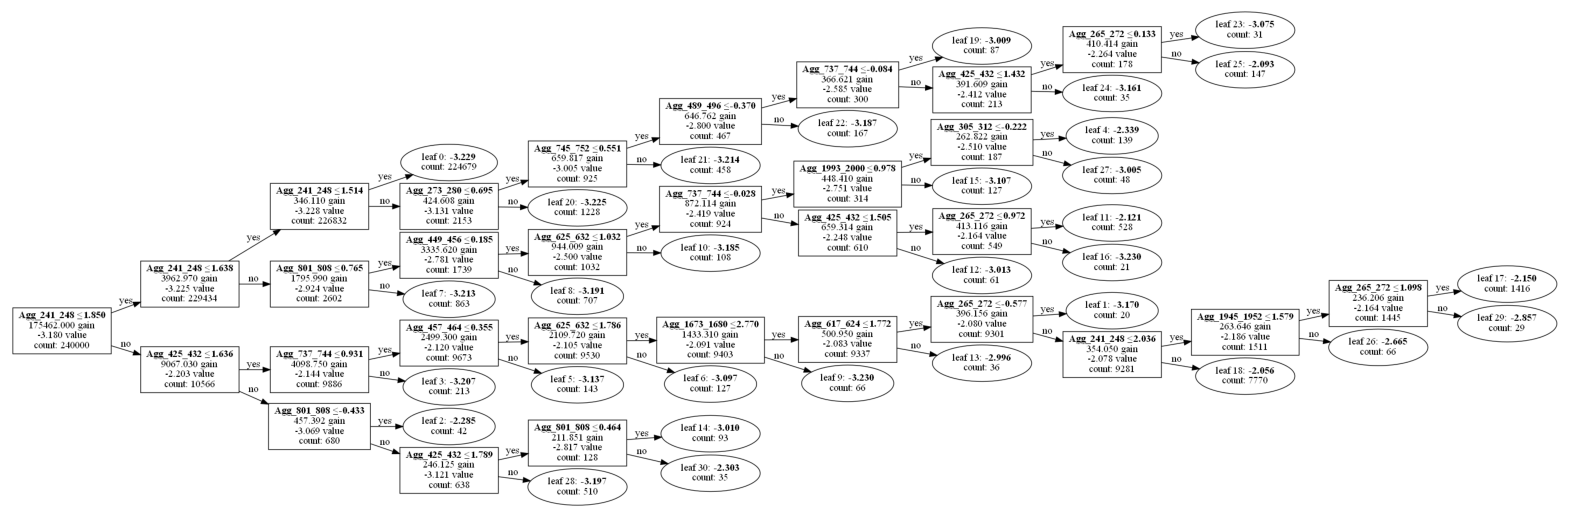

In [163]:
# Plotting the first tree
lgb.plot_tree(bst, tree_index=0, figsize=(20, 15), show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'])
plt.show()

In [200]:
import matplotlib.pyplot as plt

def plot_mineral_phase(df, important_features):    
    # Group by 'Mineral Phase' and calculate the mean for each channel
    grouped_df = df.groupby('Mineral Phase').mean()

    plt.figure(figsize=(15, 7))

    # Plotting each mineral phase
    for mineral in grouped_df.index:
        plt.plot(grouped_df.columns, grouped_df.loc[mineral], label=mineral)

    # Setting x-ticks
    num_columns = len(grouped_df.columns)
    ticks = list(range(0, num_columns, 30))
    labels = [grouped_df.columns[i] for i in ticks]

    # Draw vertical lines for important features and annotate them
    for feature in important_features:
        if feature in grouped_df.columns:
            plt.axvline(x=feature, color='green', linestyle='--', linewidth=0.7)
            plt.text(feature, grouped_df.max().max(), feature, rotation=90, verticalalignment='top', color='blue', fontsize=6)

    plt.xticks(ticks, labels, rotation=45)

    plt.title('Average Channel Counts by Mineral Phase with Important Features Highlighted')
    plt.xlabel('Channels')
    plt.ylabel('Average Count')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

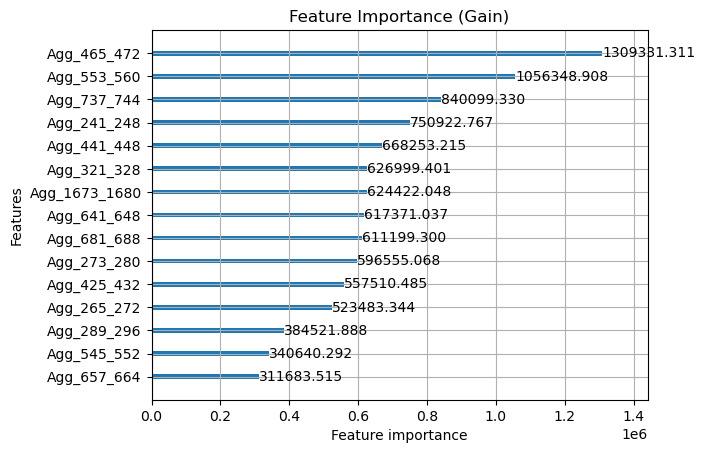

In [174]:
lgb.plot_importance(bst, max_num_features=15, importance_type='gain')
plt.title("Feature Importance (Gain)")
plt.show()

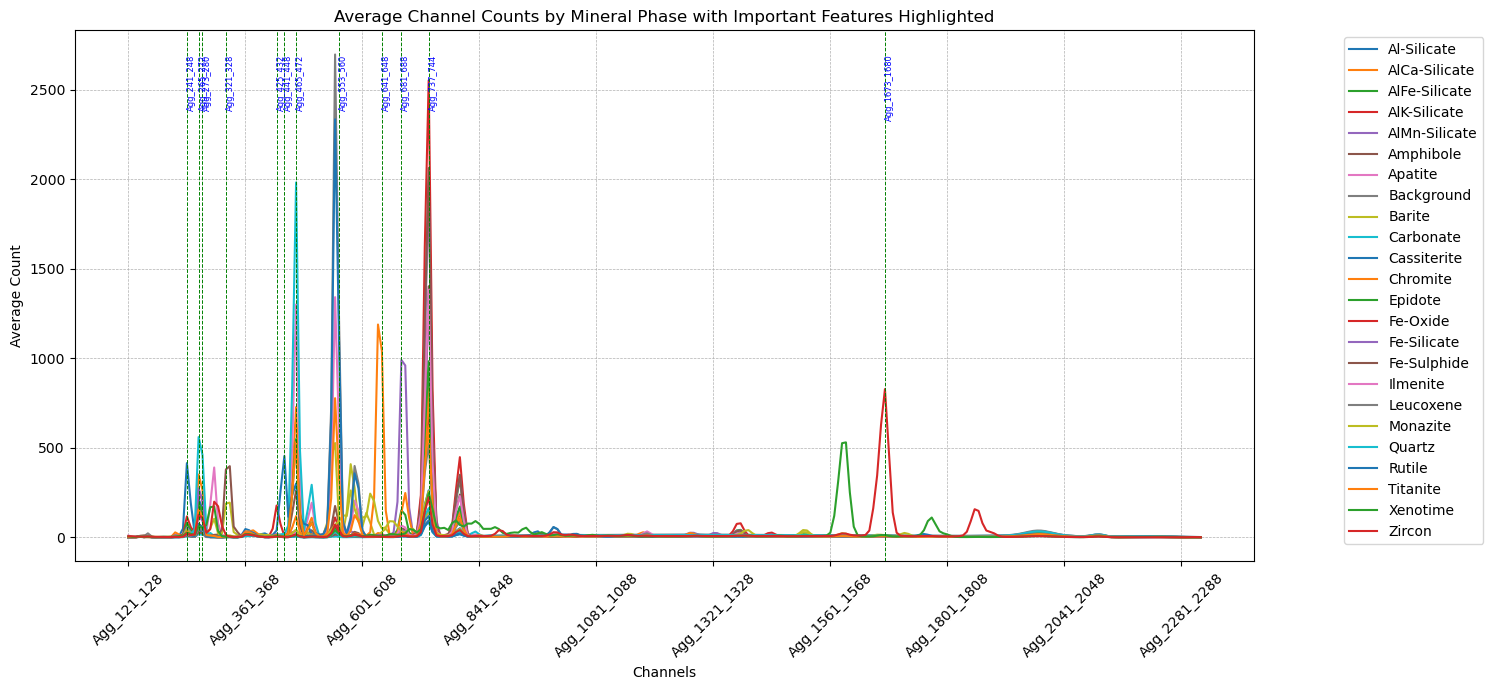

In [234]:
#Load data for training
path = "E:\\CP_processed_data\\resampled_data.csv"
df = pd.read_csv(path)

# Extract the top 12 feature names
feature_names = bst.feature_name()
importance = bst.feature_importance(importance_type='gain')
sorted_idx = np.argsort(importance)[-12:]
top_features = [feature_names[i] for i in sorted_idx]

# Plot using the provided function
plot_mineral_phase(df, top_features)

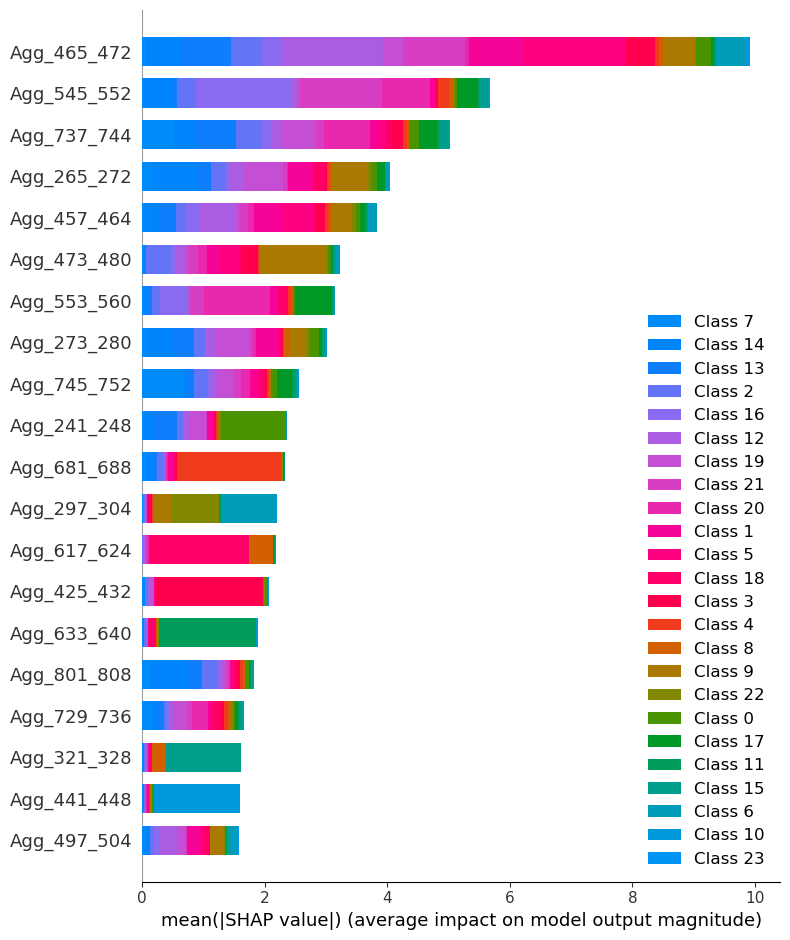

In [178]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_balanced_transformed)

# Summarize the SHAP values to get global feature importance
shap.summary_plot(shap_values, X_balanced_transformed)

## XGBoost

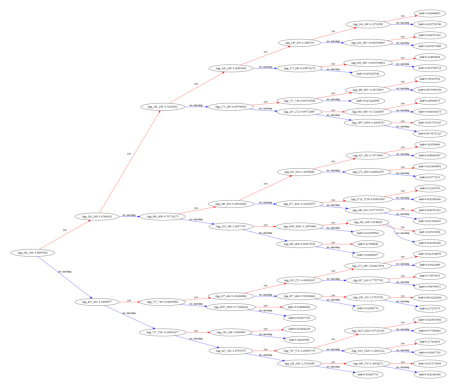

In [187]:
# Plotting the first tree
xgb.plot_tree(bst_xgb, num_trees=0, rankdir='LR')
plt.show()

In [183]:
trees_dump = bst_xgb.get_dump()

# This will print the structure of the first tree
print(trees_dump[0])

0:[Agg_241_248<1.88870311] yes=1,no=2,missing=2
	1:[Agg_241_248<1.65106142] yes=3,no=4,missing=4
		3:[Agg_241_248<1.54239202] yes=7,no=8,missing=8
			7:[Agg_241_248<1.41092968] yes=15,no=16,missing=16
				15:[Agg_249_256<1.3686794] yes=31,no=32,missing=32
					31:[Agg_241_248<1.22712982] yes=55,no=56,missing=56
						55:leaf=-0.026068015
						56:leaf=-0.0235763546
					32:[Agg_281_288<-0.0143540865] yes=57,no=58,missing=58
						57:leaf=0.0210765302
						58:leaf=-0.0250271689
				16:[Agg_273_280<0.638711274] yes=33,no=34,missing=34
					33:[Agg_681_688<-0.0256540012] yes=59,no=60,missing=60
						59:leaf=0.124091804
						60:leaf=-0.0137316724
					34:leaf=-0.0259207636
			8:[Agg_273_280<0.697949111] yes=17,no=18,missing=18
				17:[Agg_737_744<0.667935848] yes=35,no=36,missing=36
					35:[Agg_489_496<-0.30758059] yes=61,no=62,missing=62
						61:leaf=0.305027932
						62:leaf=0.00735895196
					36:leaf=-0.0252216998
				18:[Agg_265_272<0.695724607] yes=37,no=38,missing=38
					37:[Ag

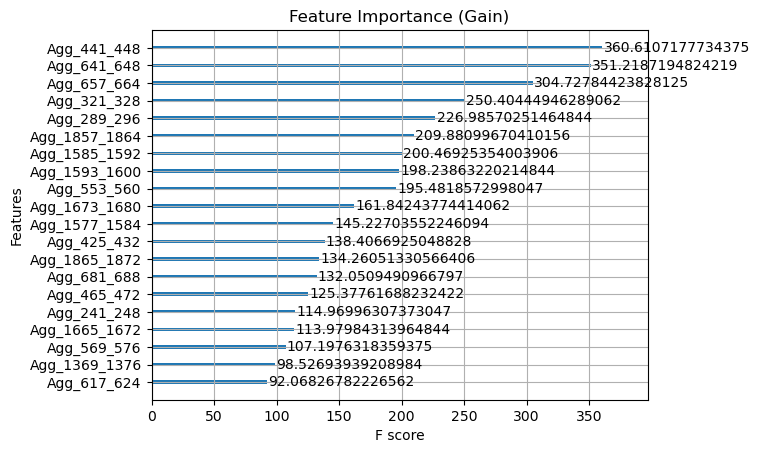

In [182]:
xgb.plot_importance(bst_xgb, max_num_features=20, importance_type='gain', title='Feature Importance (Gain)')
plt.show()

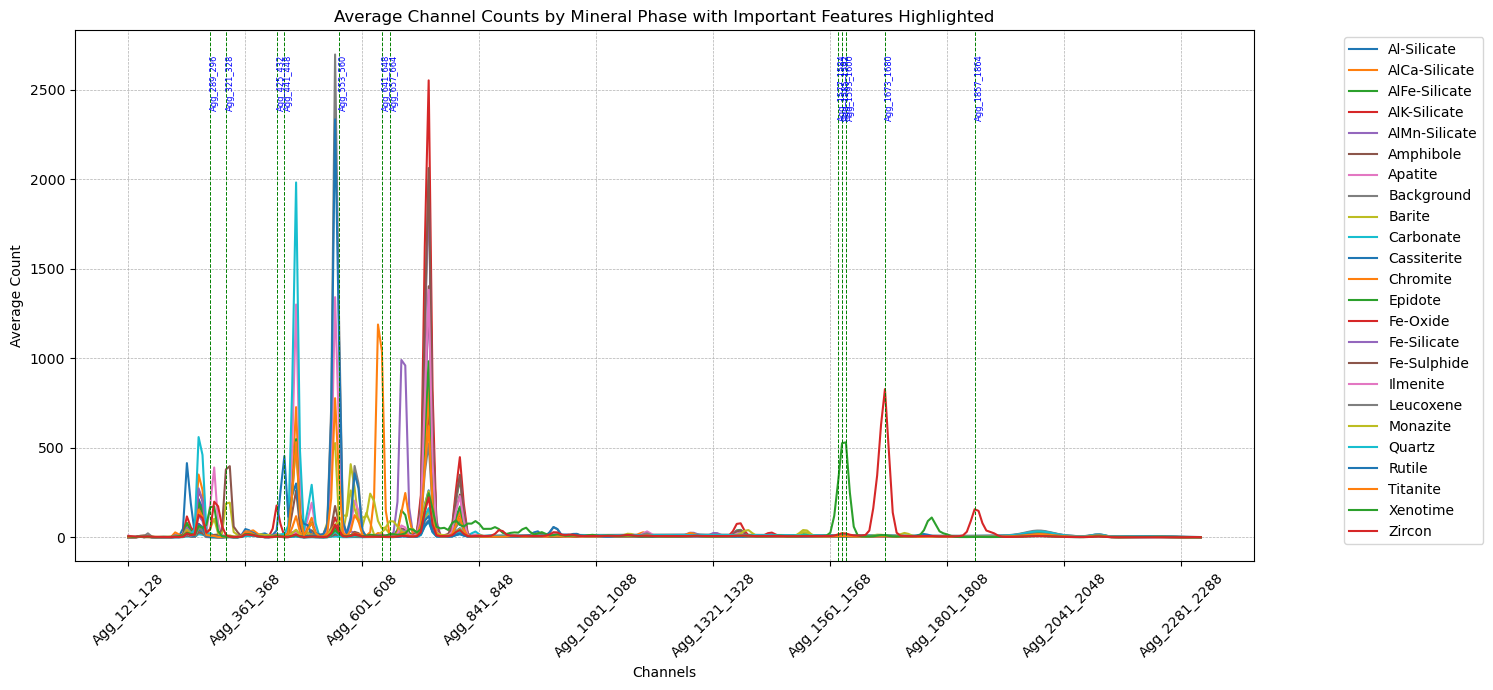

In [202]:
# Extract the top 12 feature names
feature_scores = bst_xgb.get_score(importance_type='gain')
sorted_feature_scores = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
top_features = [item[0] for item in sorted_feature_scores[:12]]

# Plot using the provided function
plot_mineral_phase(df, top_features)

## CatBoost

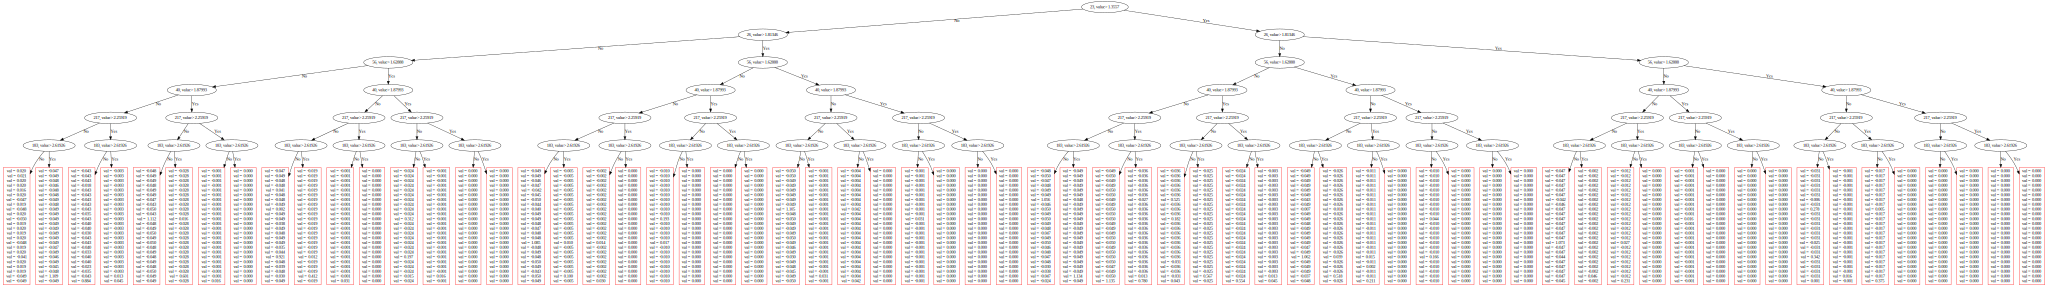

In [205]:
bst_cat.plot_tree(
    tree_idx=0,
)

<Figure size 1200x800 with 0 Axes>

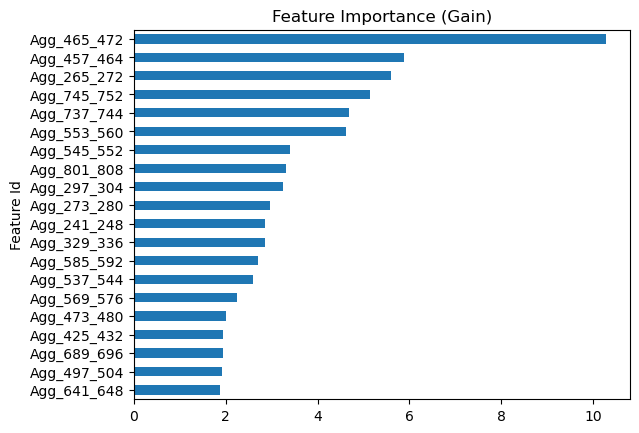

In [192]:
# Feature importance
feature_importances = bst_cat.get_feature_importance(prettified=True)
plt.figure(figsize=(12, 8))
feature_importances.set_index('Feature Id').iloc[:20].plot(kind='barh', legend=False)
plt.title('Feature Importance (Gain)')
plt.gca().invert_yaxis()
plt.show()

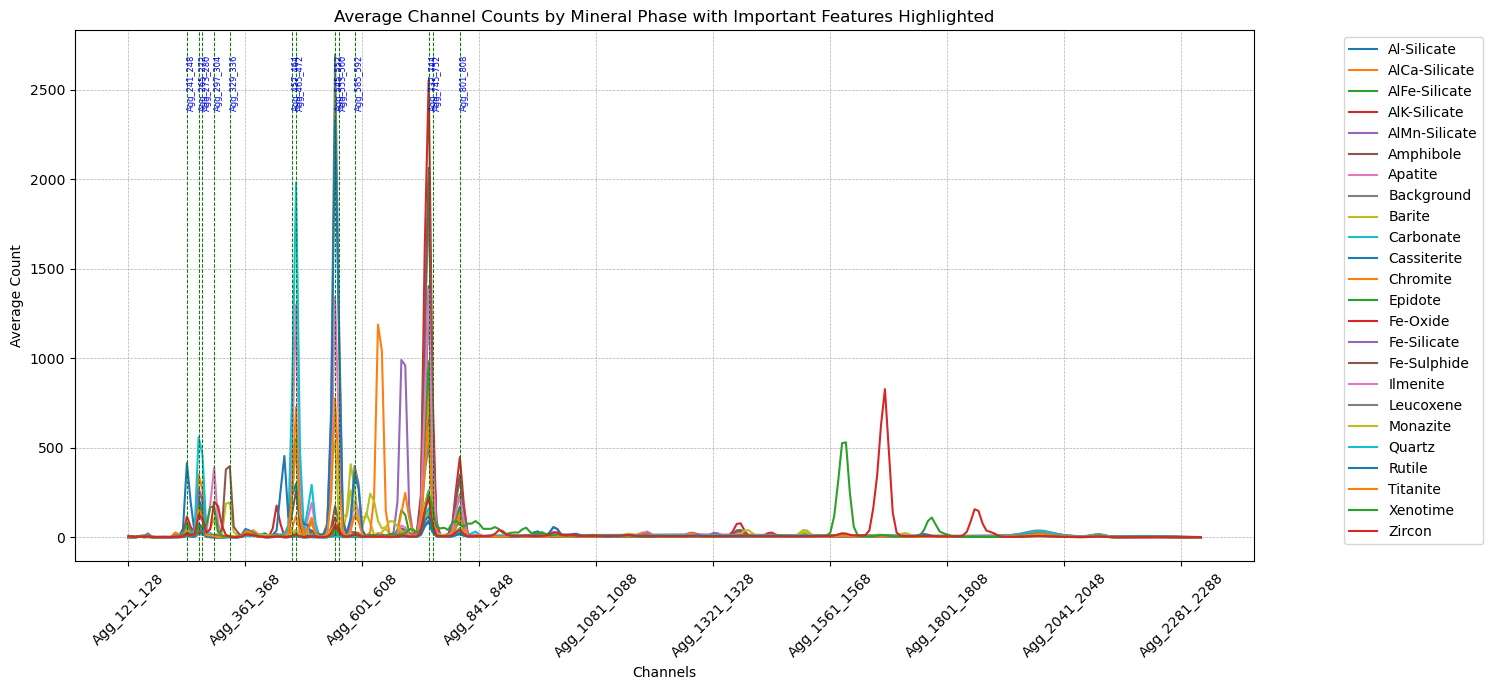

In [203]:
# Extract the top 15 feature names
top_features = feature_importances['Feature Id'][:13].tolist()

# Plot using the provided function
plot_mineral_phase(df, top_features)

## TabNet

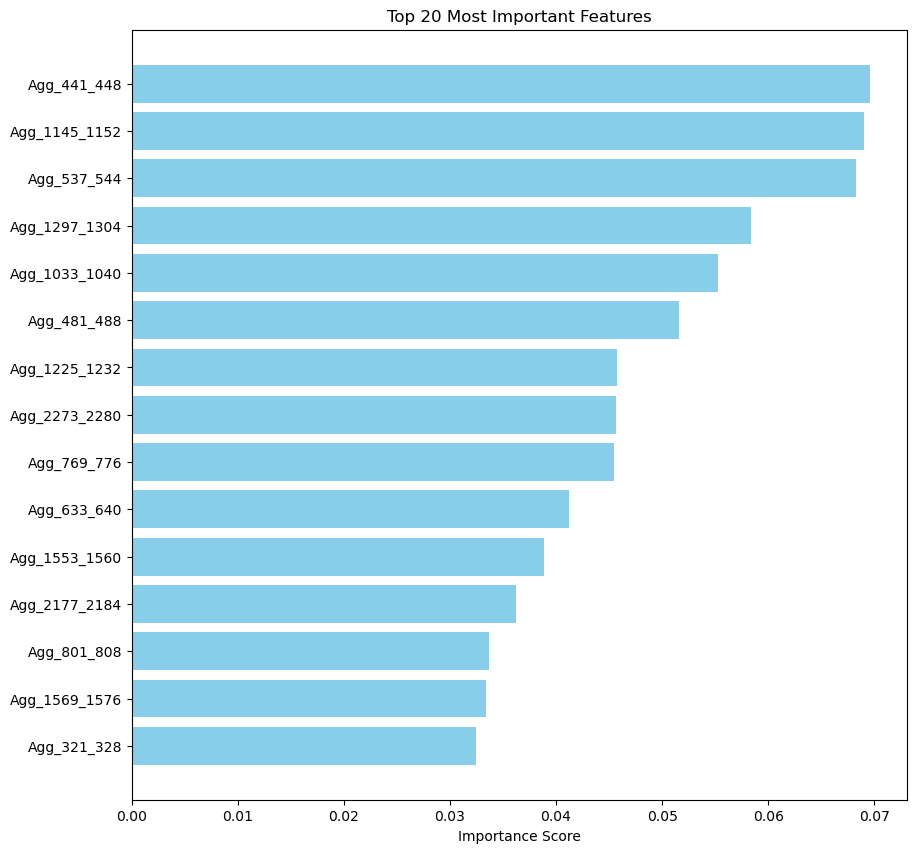

In [237]:
# Sorting the features based on importance
sorted_idx = np.argsort(importances)[-15:]
top_features = [X_train.columns[i] for i in sorted_idx]
top_importances = [importances[i] for i in sorted_idx]

# Plotting
plt.figure(figsize=(10, 10))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 20 Most Important Features')
plt.gca()
plt.show()

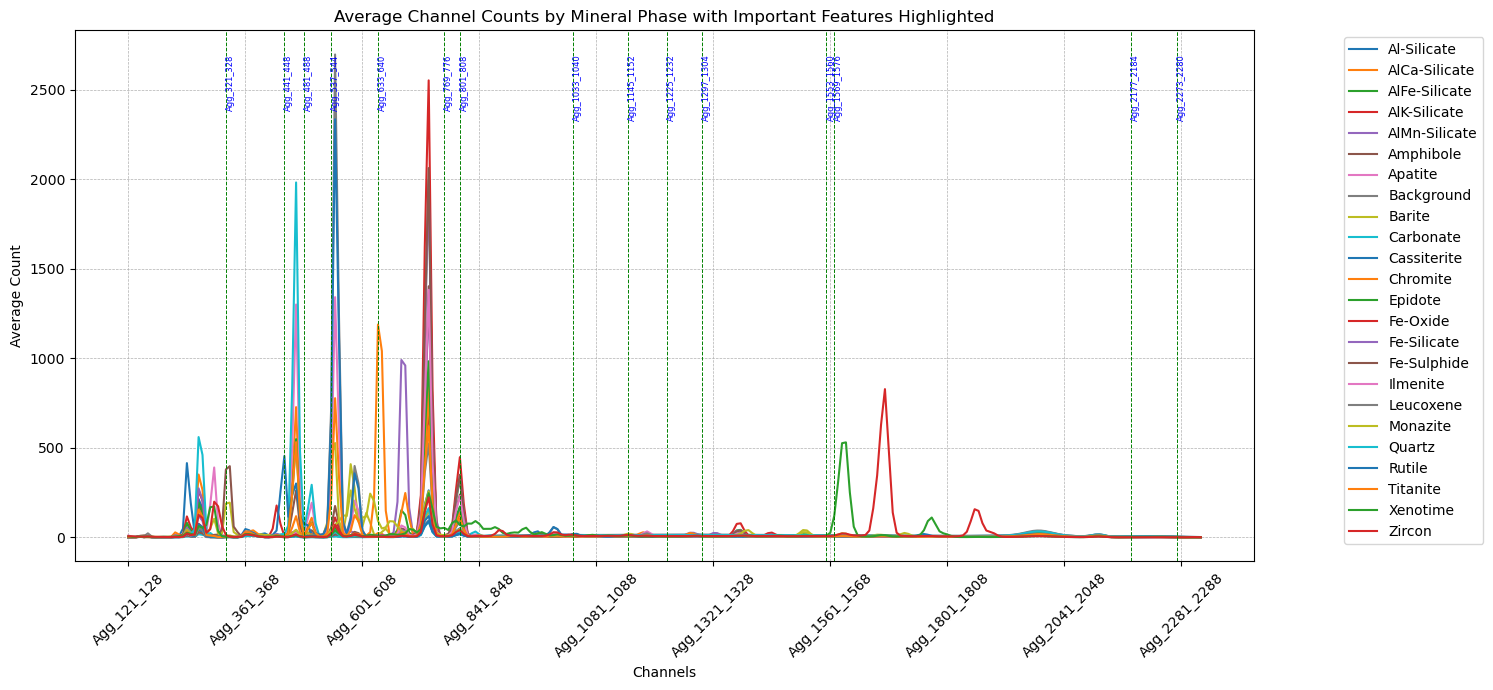

In [238]:
# Use the modified plot function with the top features
plot_mineral_phase(df, top_features)

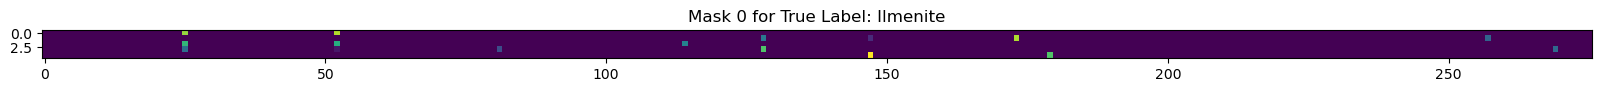

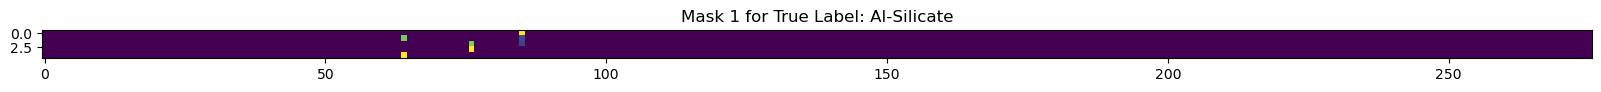

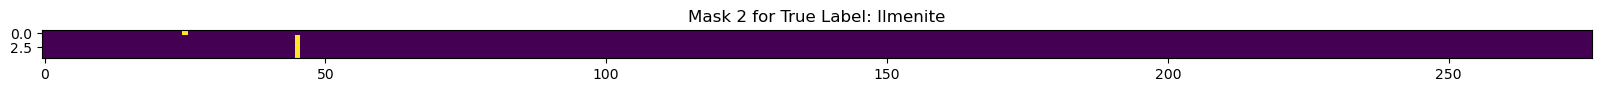

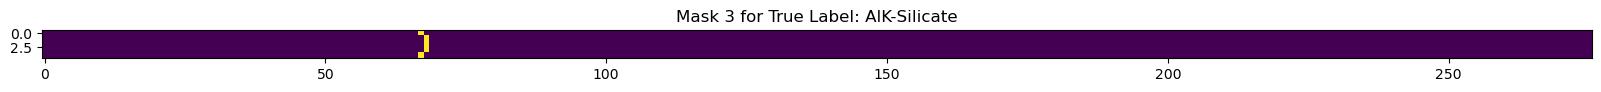

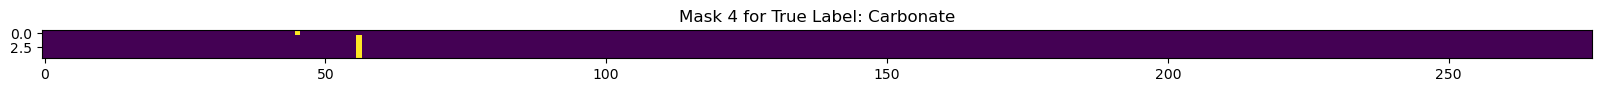

In [227]:
# Convert X_test to numpy array and get masks for first 5 samples
subset = X_test.values[:5]
explain_matrix, masks = clf.explain(subset)

# Get true labels
true_labels = y_test.iloc[:5].tolist()

# Plot each mask
for i in range(5):
    plt.figure(figsize=(20,400))
    plt.imshow(masks[i]) 
    
    # Title with the true label
    plt.title(f"Mask {i} for True Label: {true_labels[i]}")
    
    # Display the plot
    plt.show()


In [230]:
#save
bst.save_model('lightgbm_model.txt')
bst_xgb.save_model('xgboost_model.json')
bst_cat.save_model('catboost_model.cbm', format="cbm")
clf.save_model('tabnet_model.zip')

#load
# bst = lgb.Booster(model_file='lightgbm_model.txt')
# bst_xgb = xgb.Booster()
# bst_xgb.load_model('xgboost_model.json')
# bst_cat = CatBoostClassifier()
# bst_cat.load_model('catboost_model.cbm', format='cbm')
# clf.load_model('tabnet_model.zip')

Successfully saved model at tabnet_model.zip.zip


'tabnet_model.zip.zip'

# Appendix: Feature contribution for each Mineral Phase (LightGBM by SHAP)

Class Al-Silicate Summary:


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


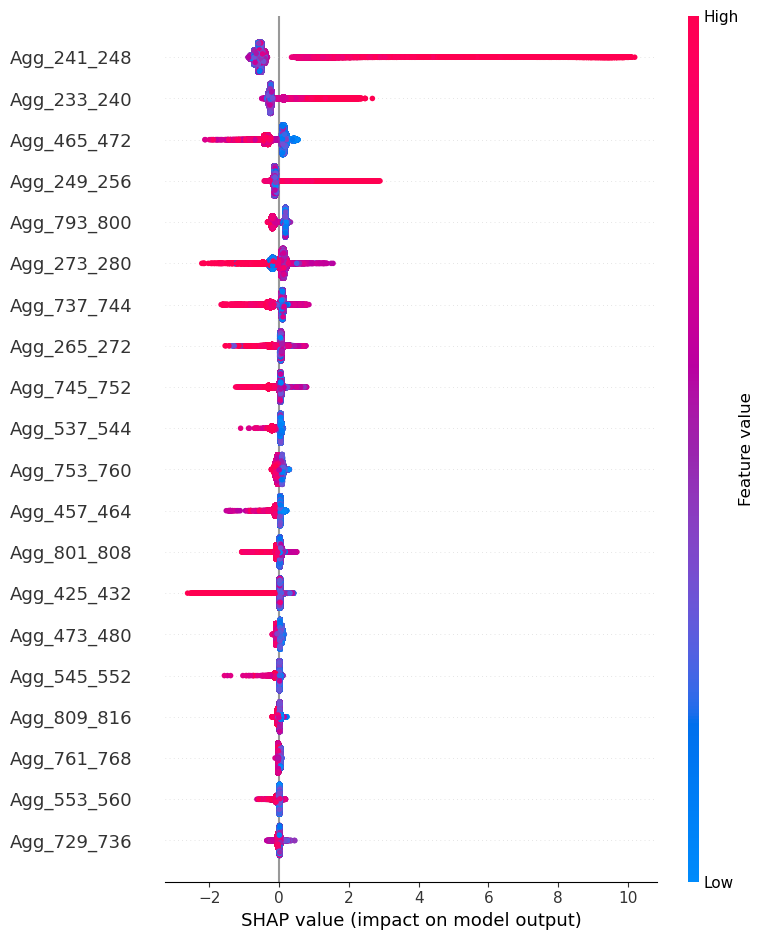

Class AlCa-Silicate Summary:


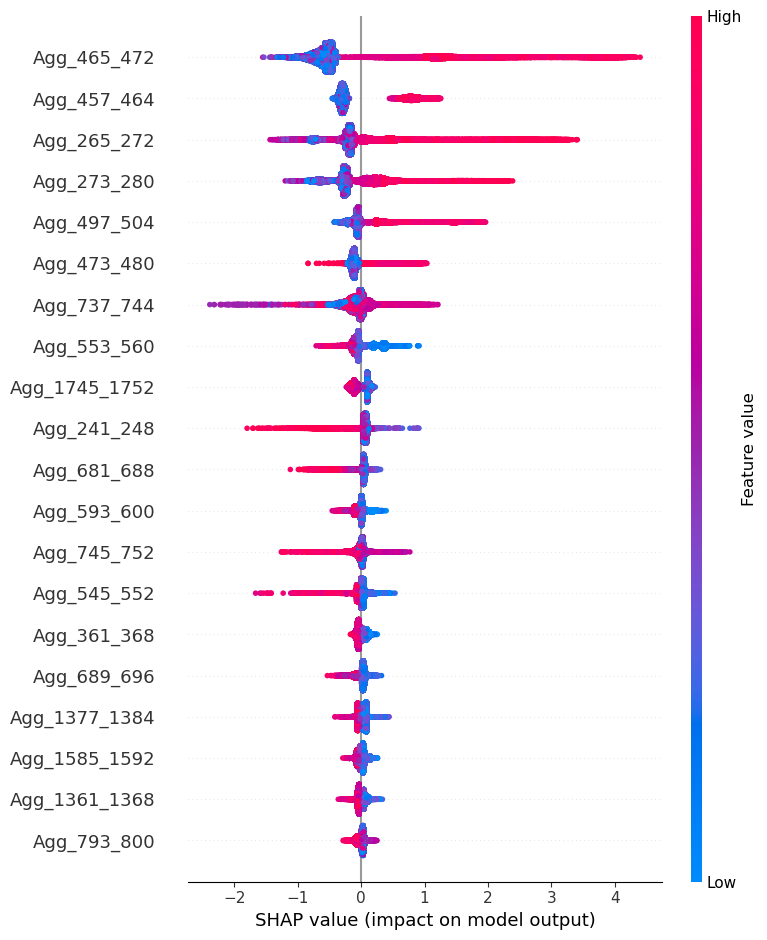

Class AlFe-Silicate Summary:


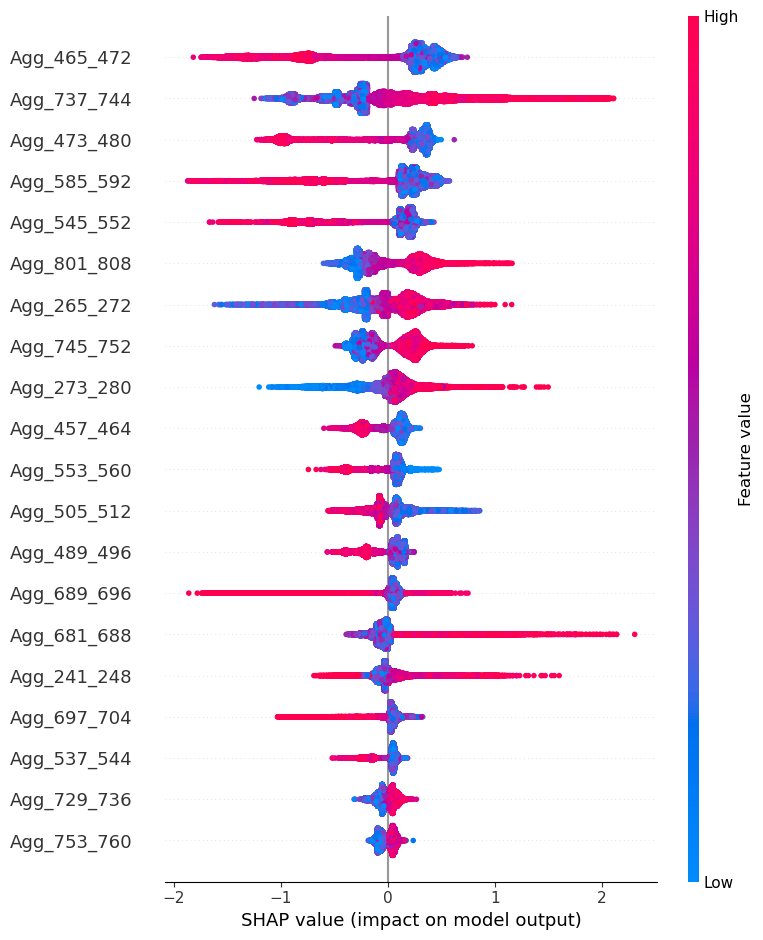

Class AlK-Silicate Summary:


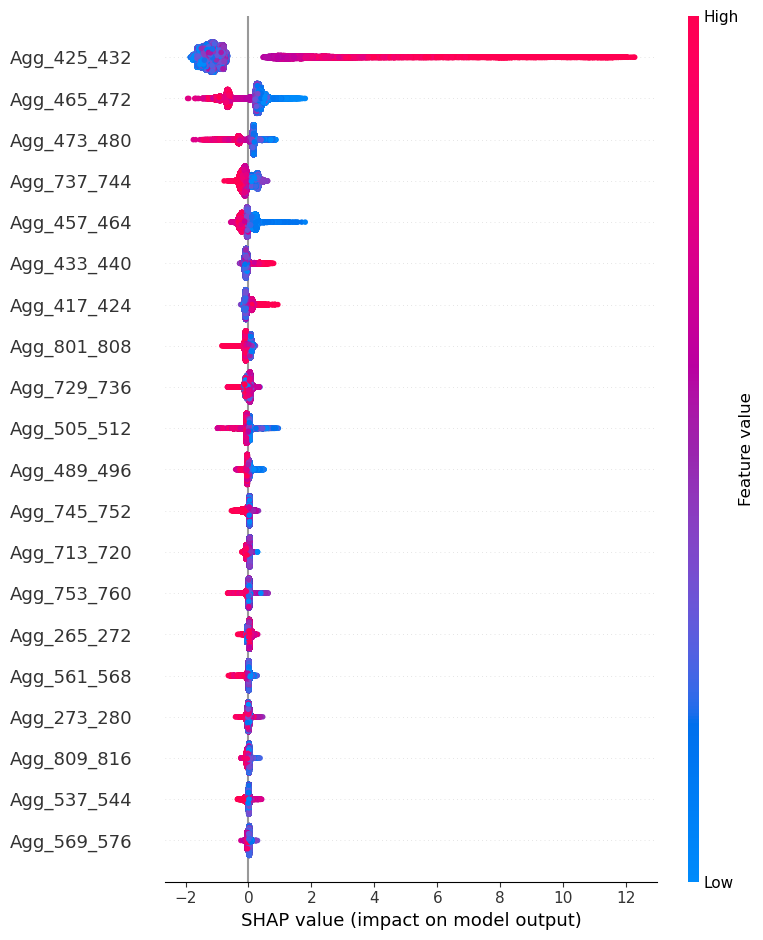

Class AlMn-Silicate Summary:


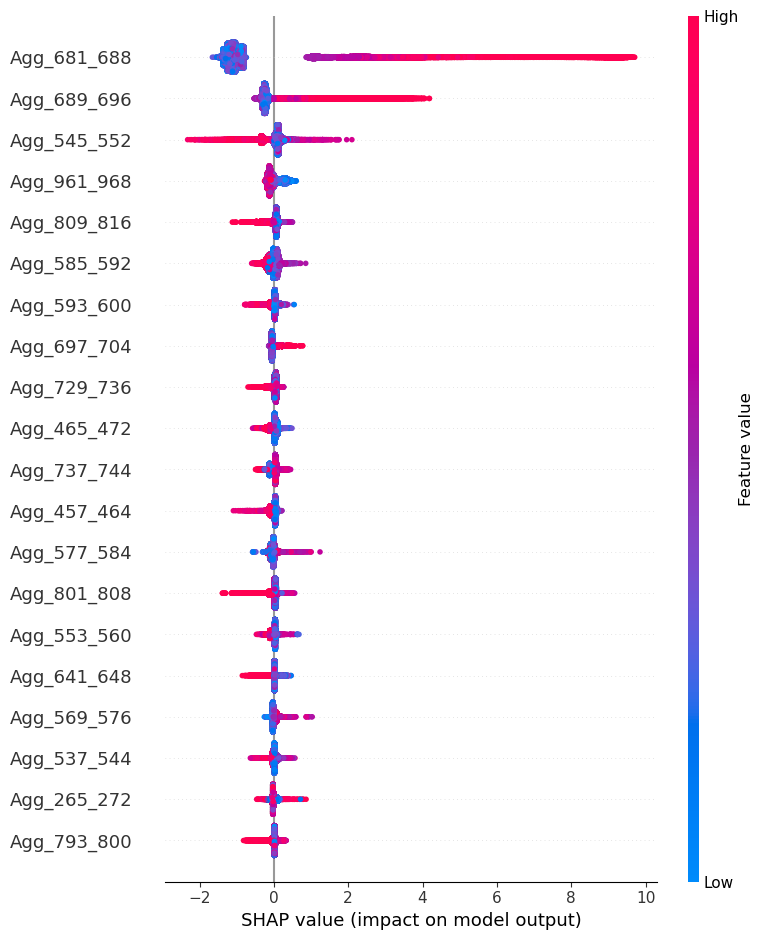

Class Amphibole Summary:


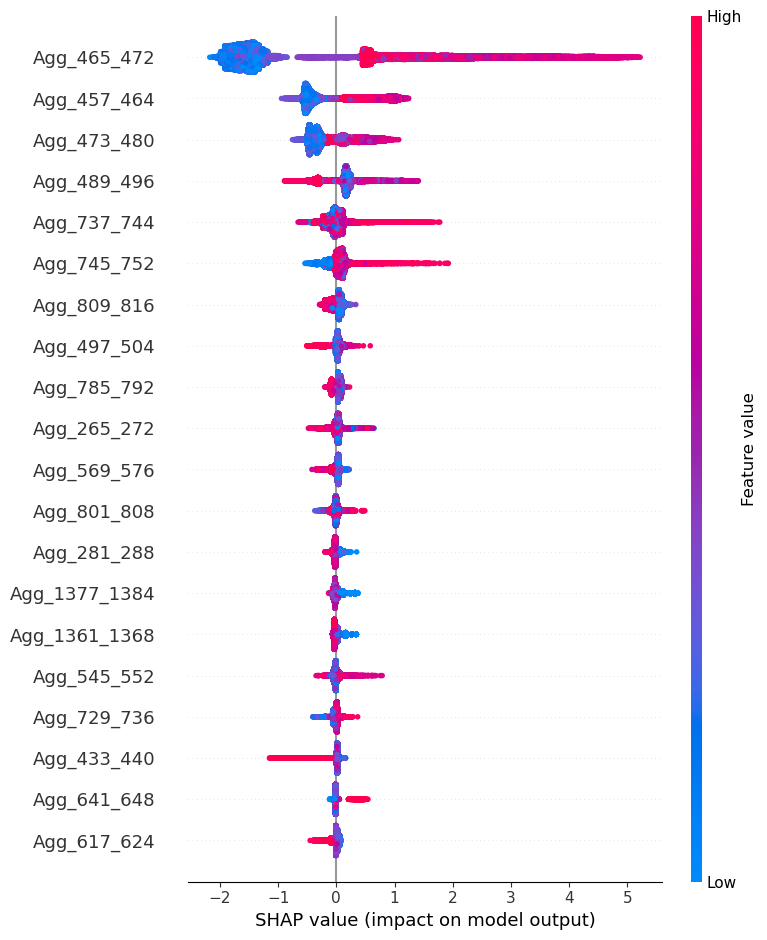

Class Apatite Summary:


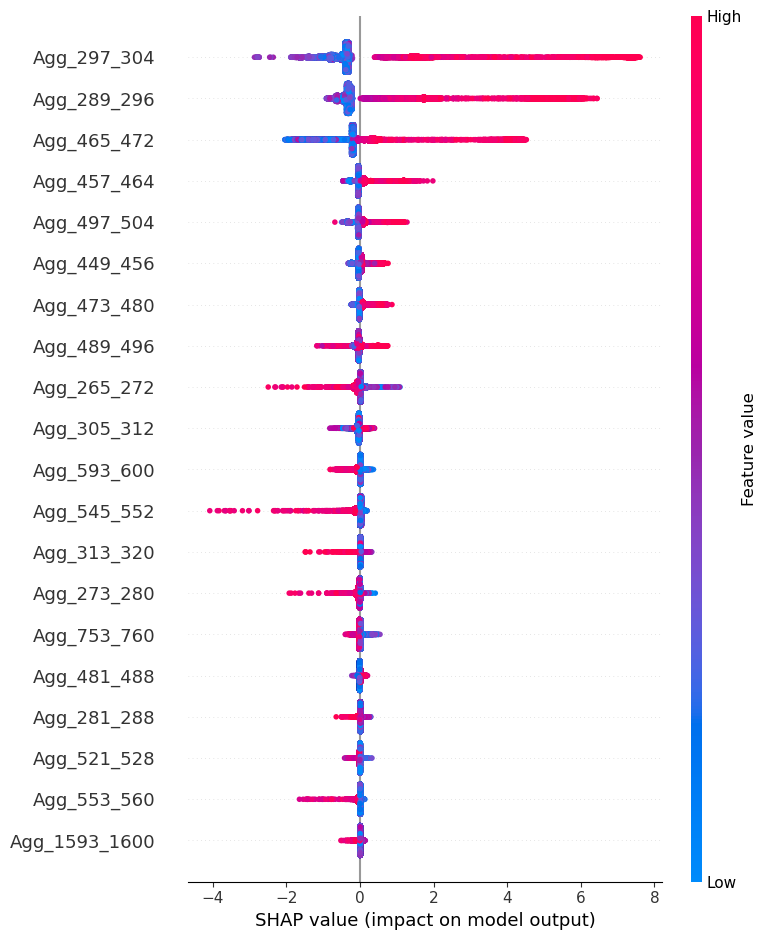

Class Background Summary:


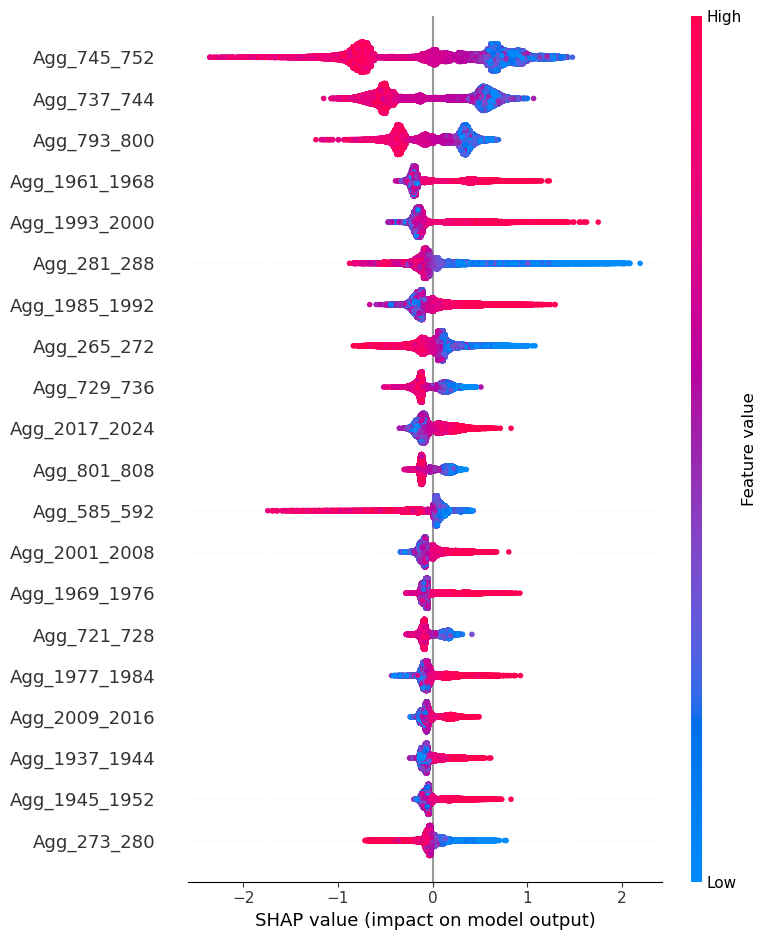

Class Barite Summary:


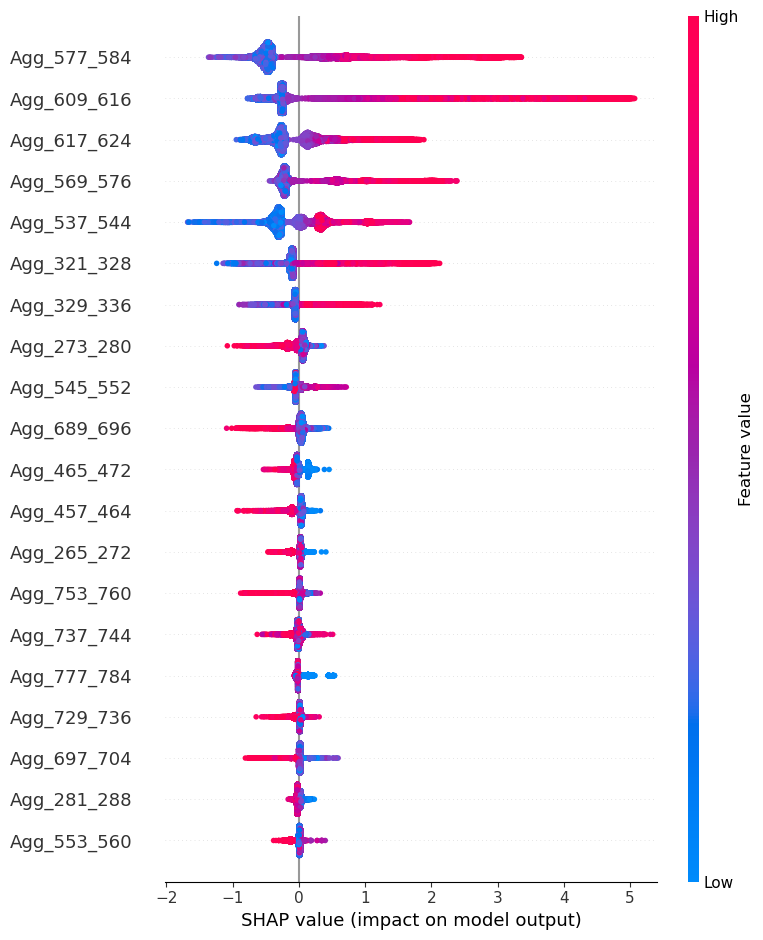

Class Carbonate Summary:


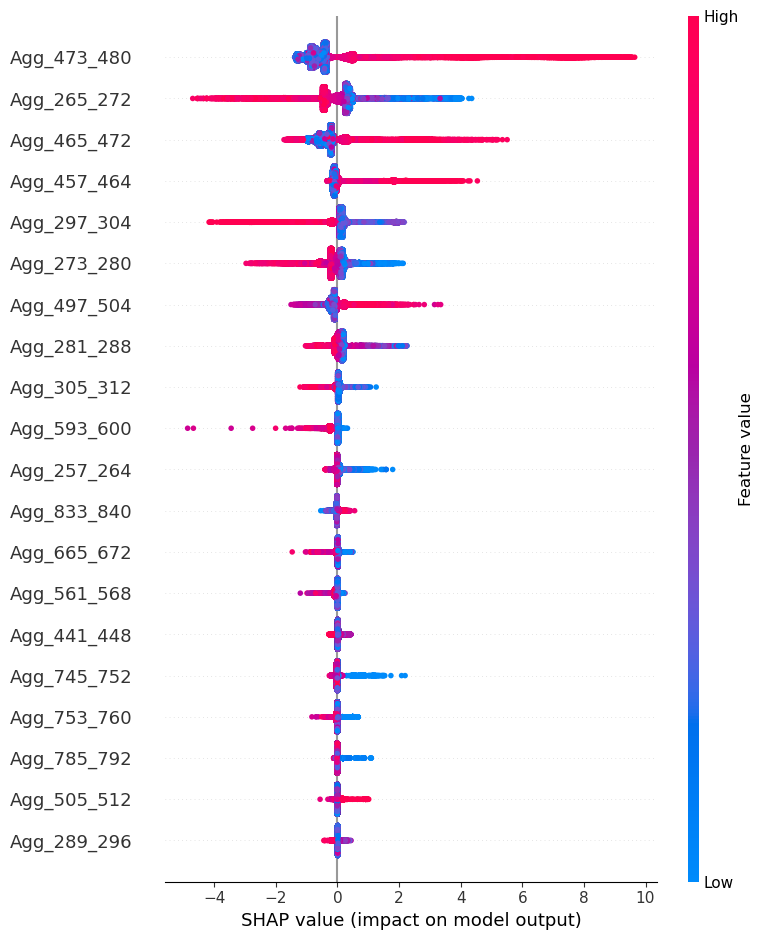

Class Cassiterite Summary:


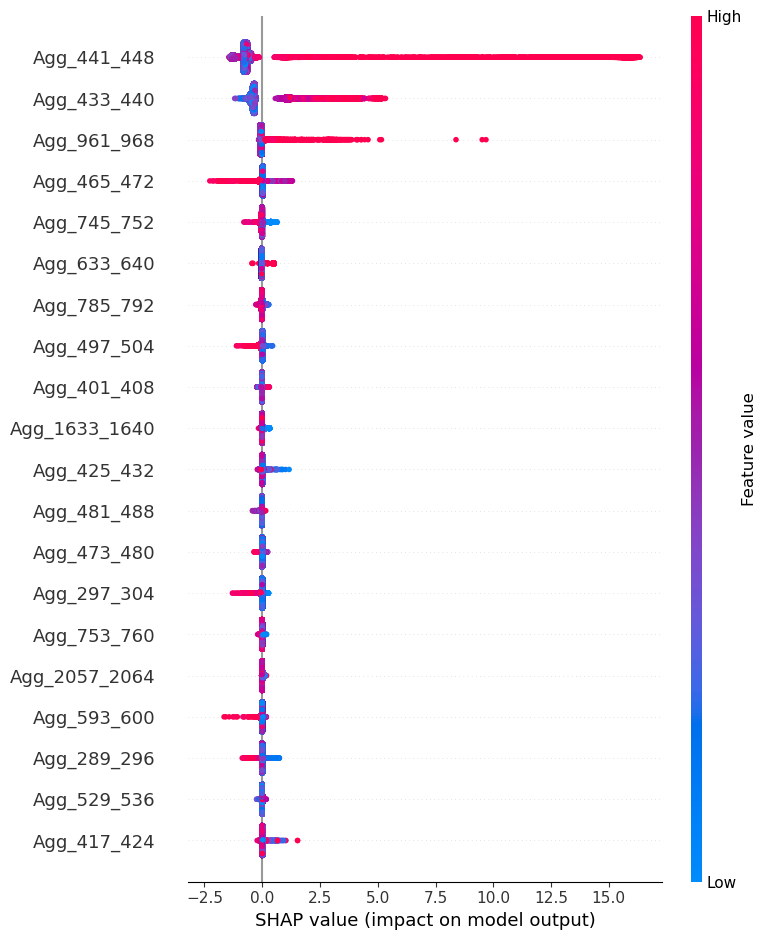

Class Chromite Summary:


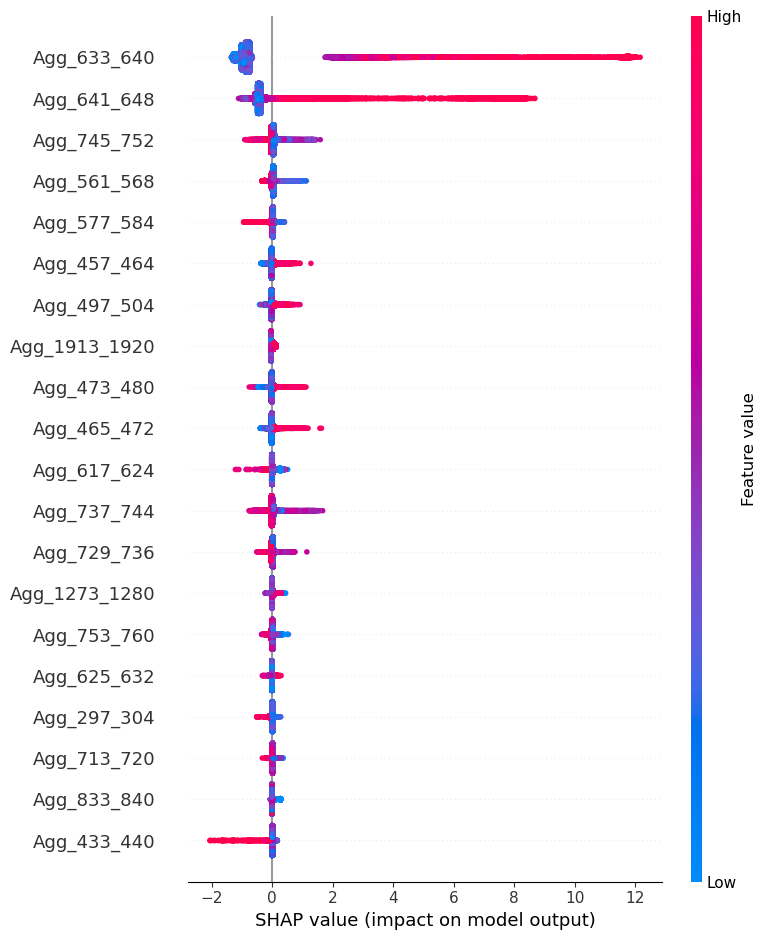

Class Epidote Summary:


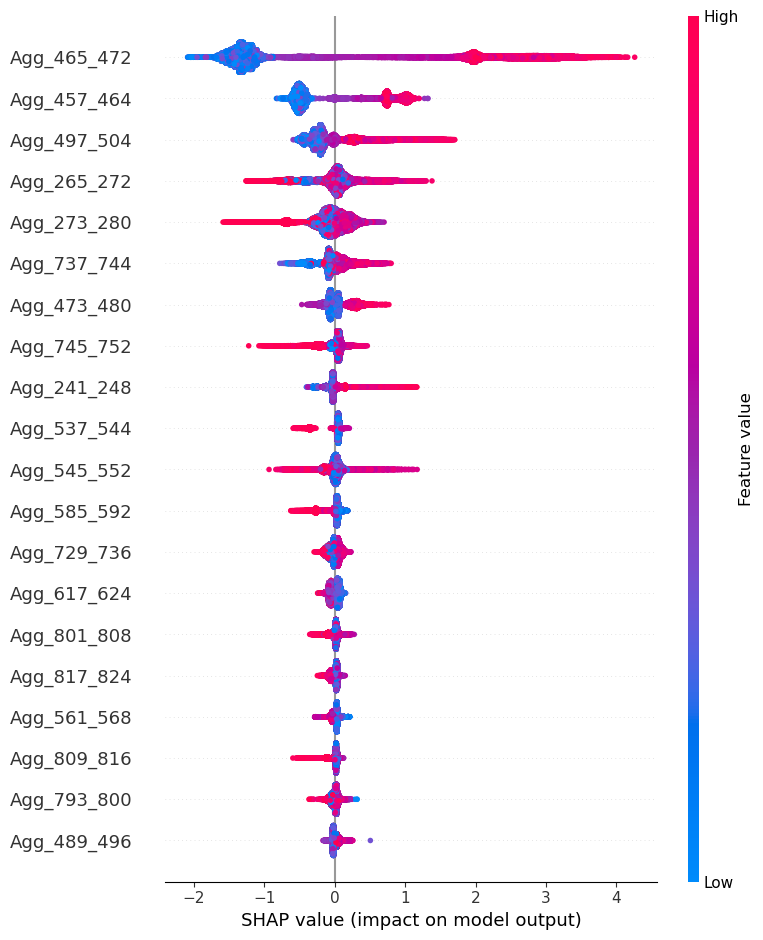

Class Fe-Oxide Summary:


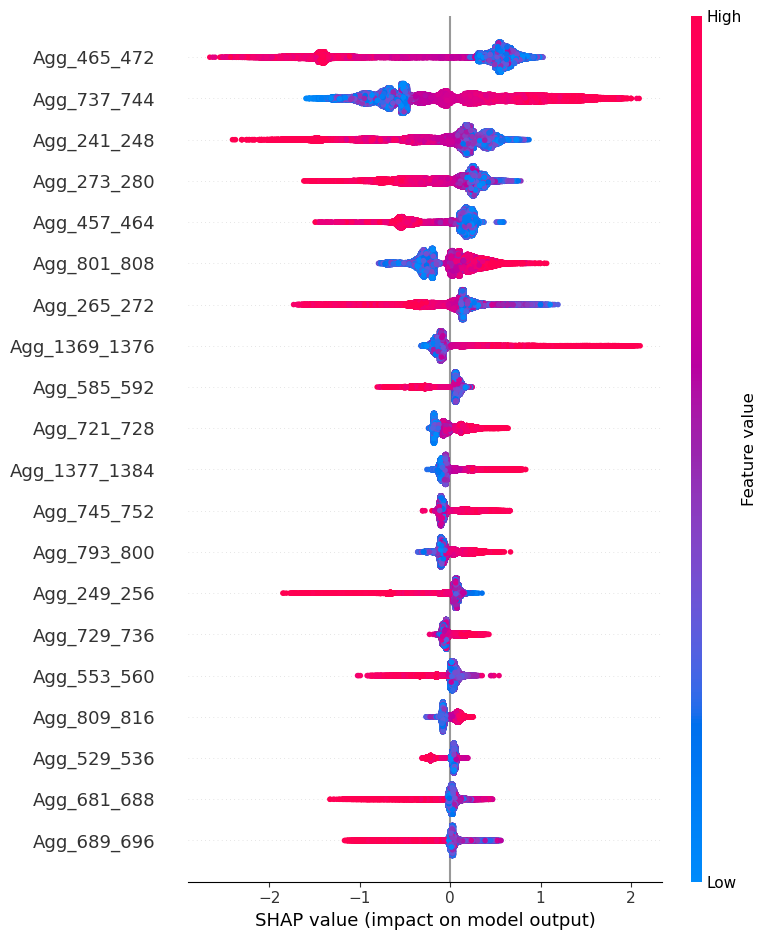

Class Fe-Silicate Summary:


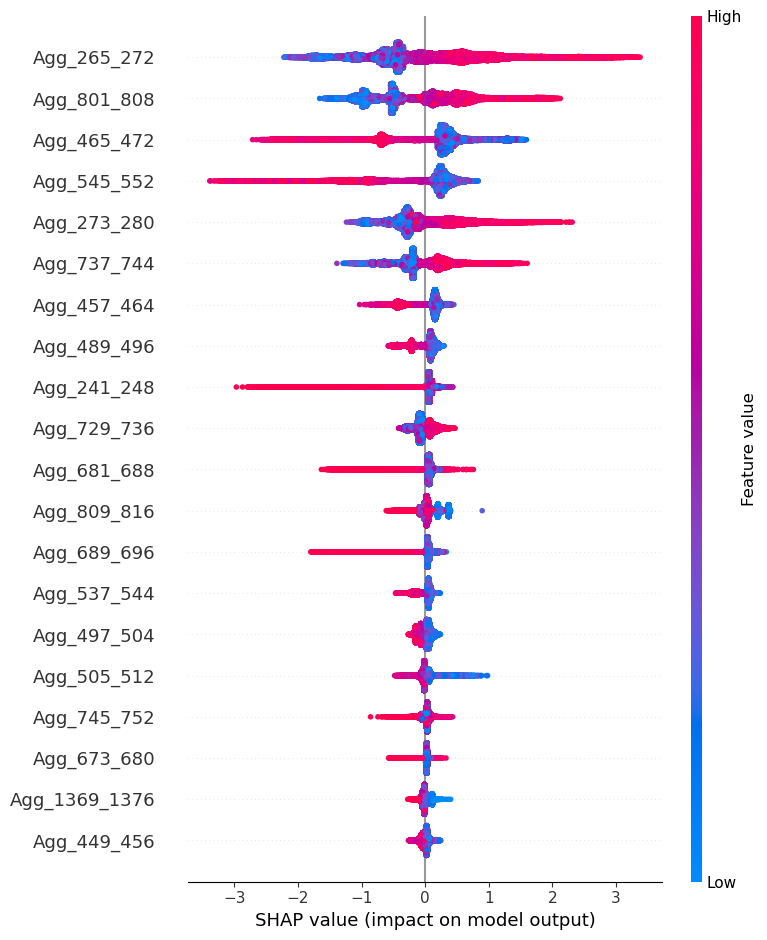

Class Fe-Sulphide Summary:


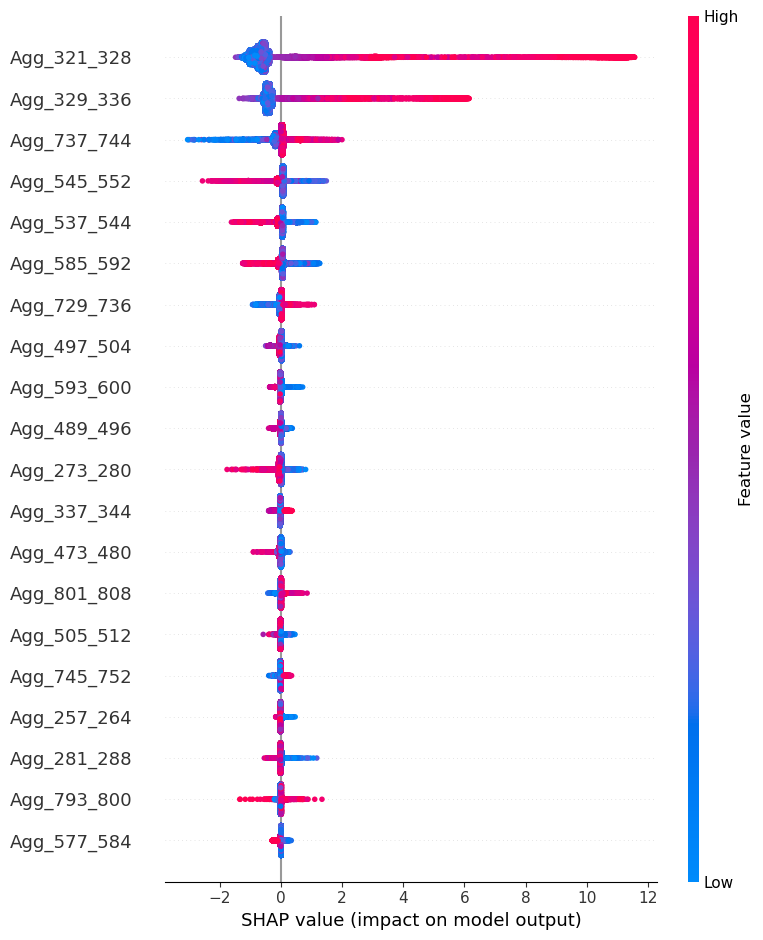

Class Ilmenite Summary:


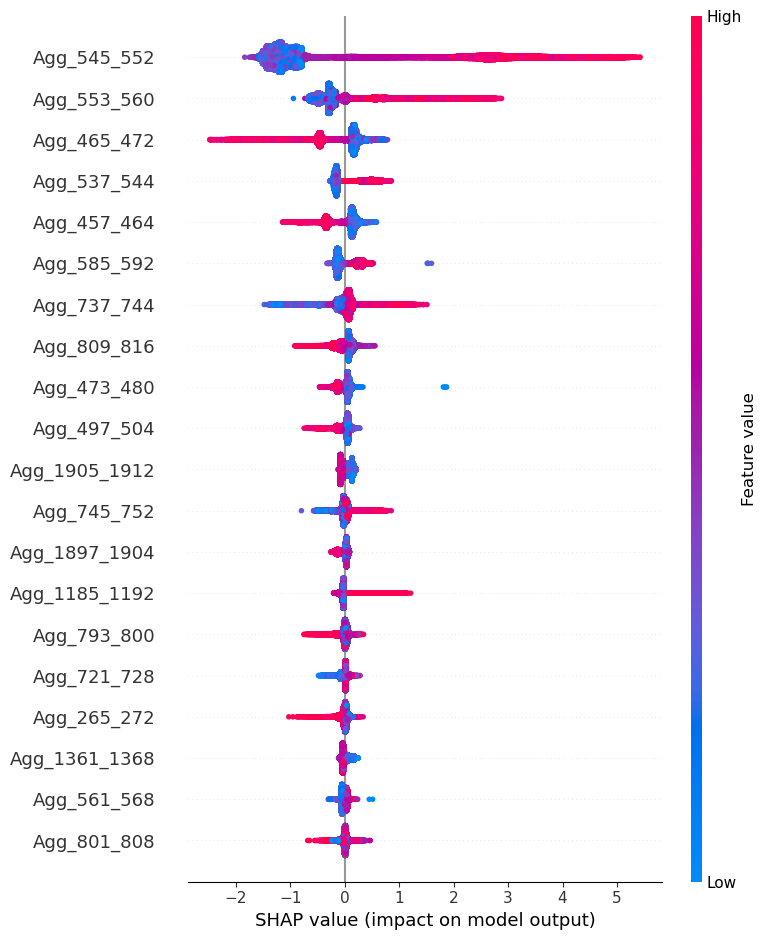

Class Leucoxene Summary:


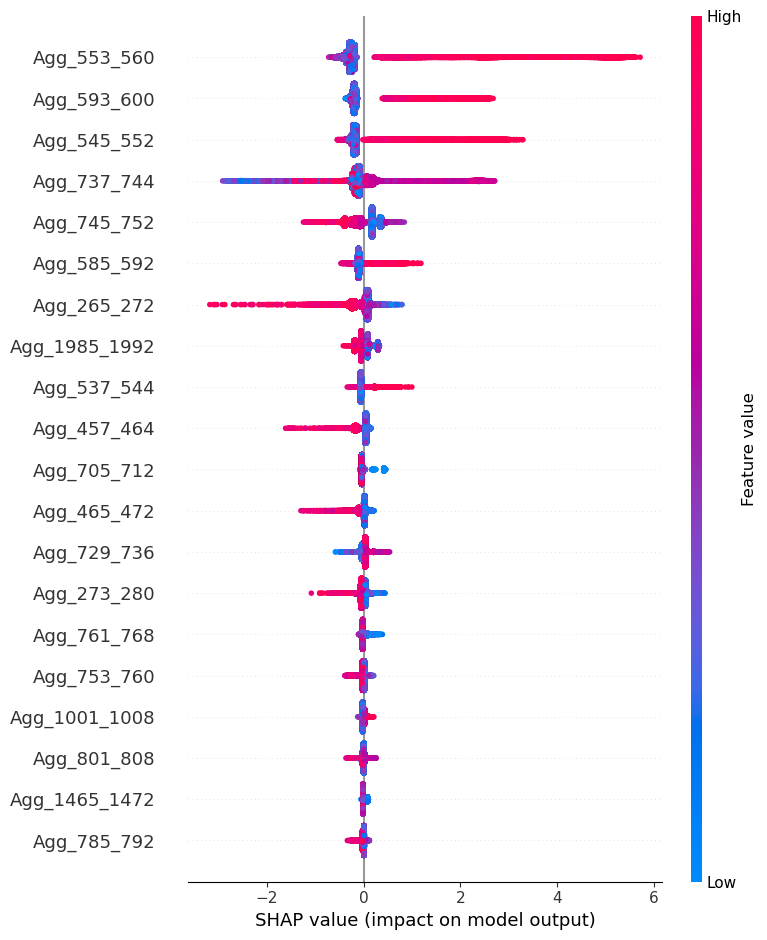

Class Monazite Summary:


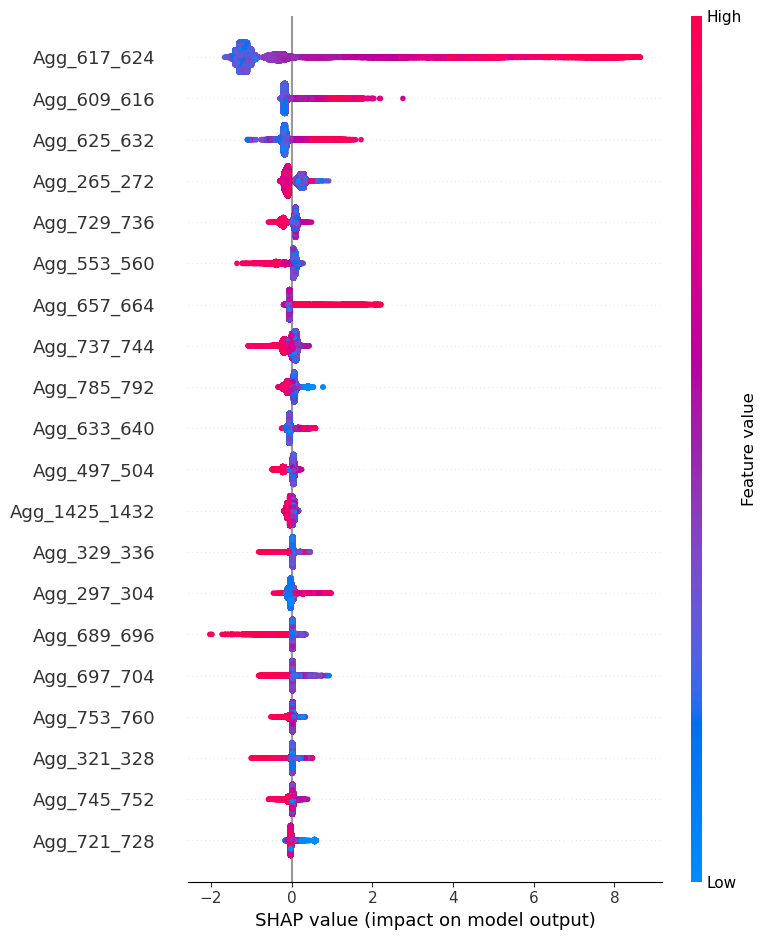

Class Quartz Summary:


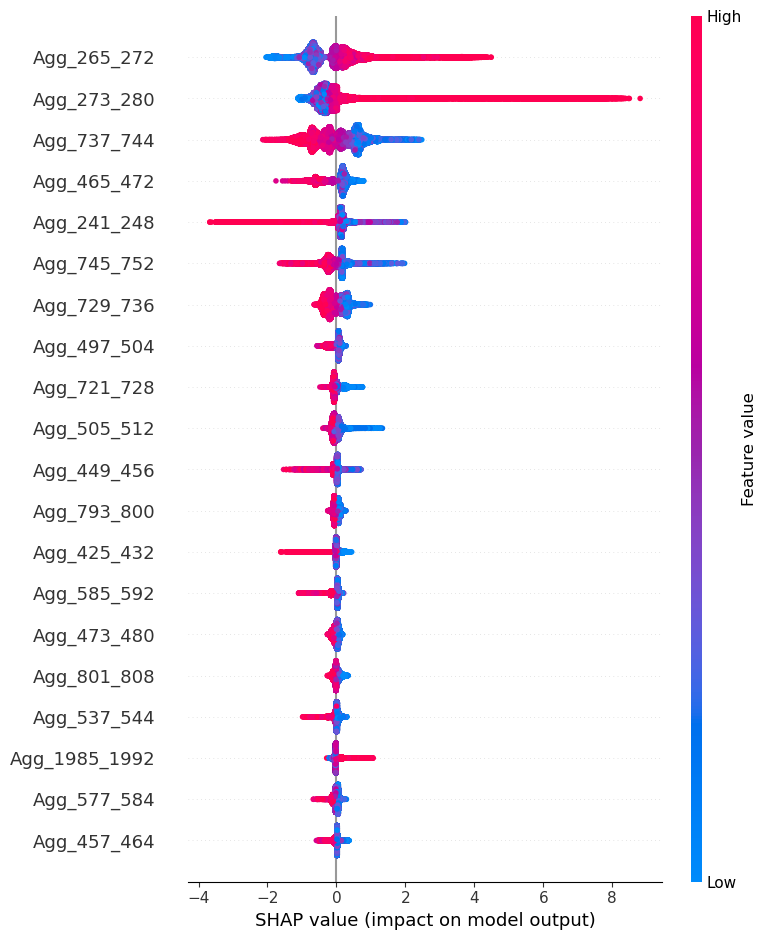

Class Rutile Summary:


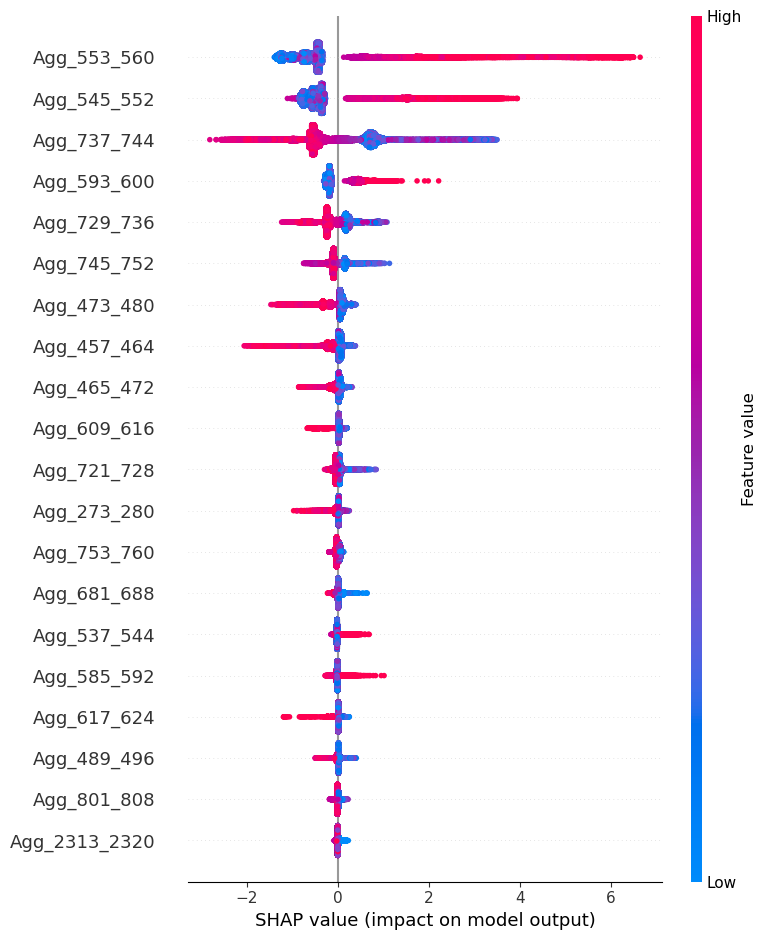

Class Titanite Summary:


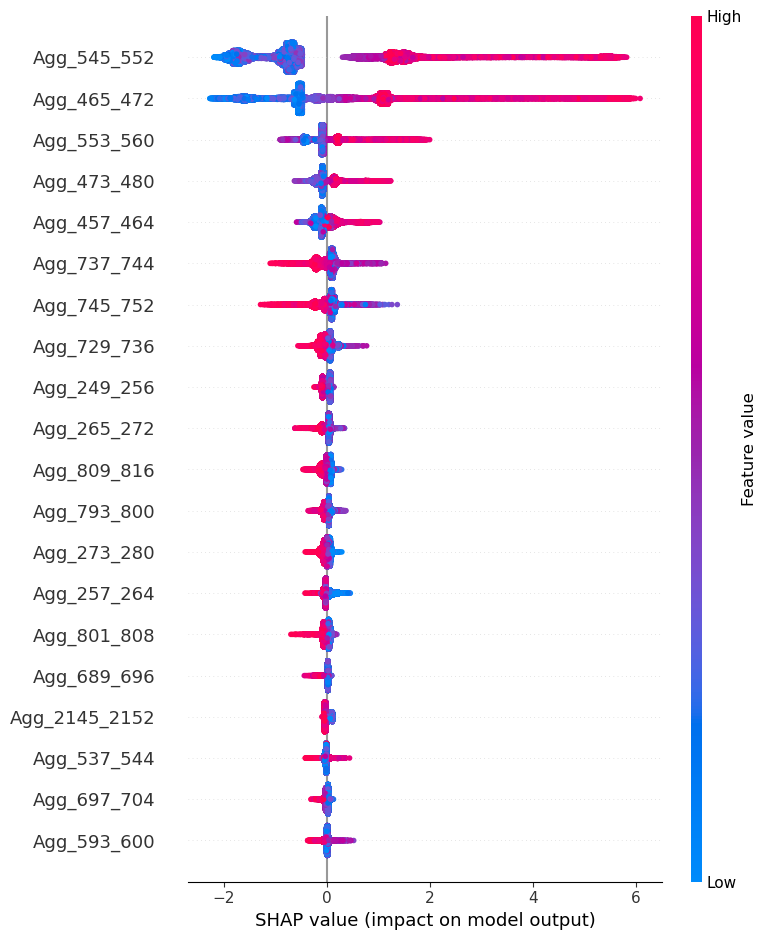

Class Xenotime Summary:


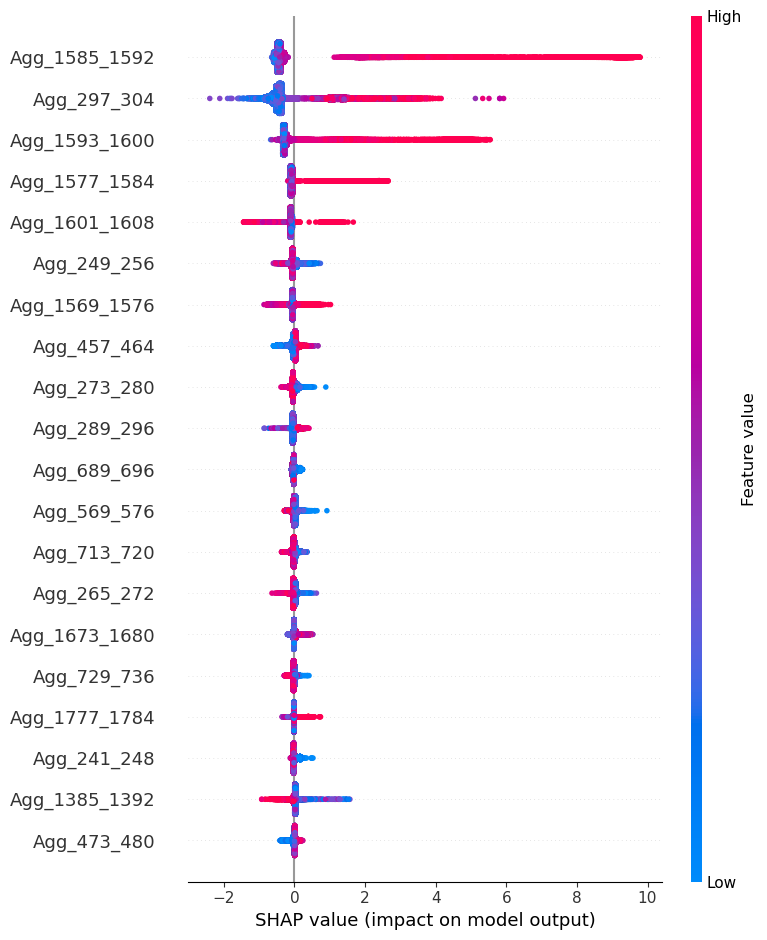

Class Zircon Summary:


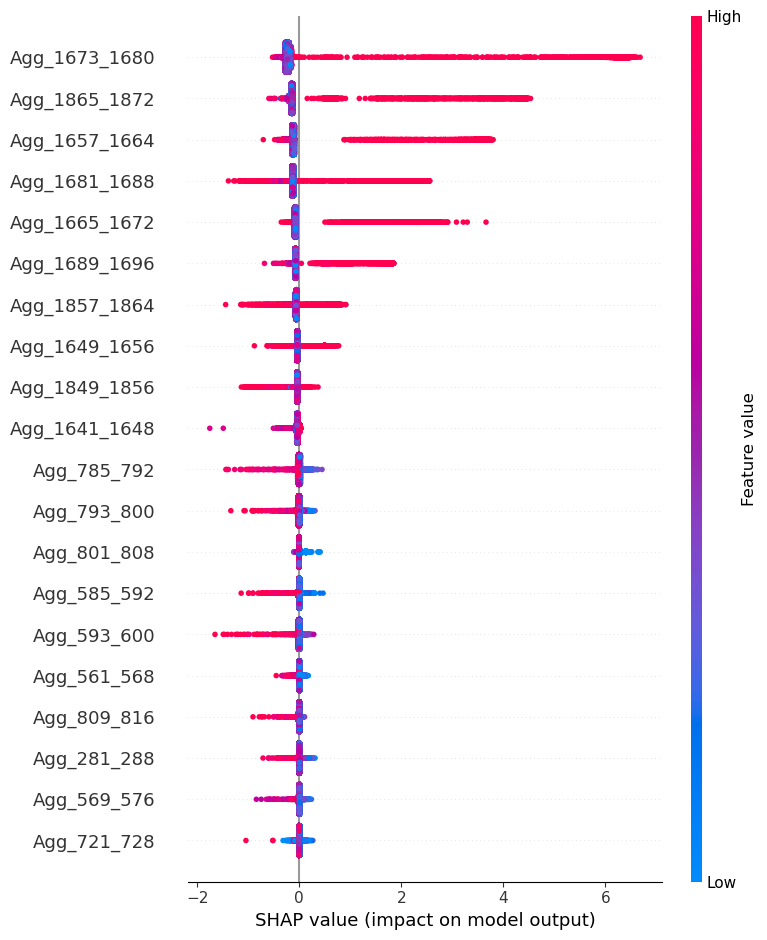

In [180]:
for i, class_name in enumerate(label_encoder.classes_):
    print(f"Class {class_name} Summary:")
    shap.summary_plot(shap_values[i], X_balanced_transformed)